In [124]:
from scipy.io import arff
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import boxcox 

data, meta = arff.loadarff('MagicTelescope.arff')

df = pd.DataFrame(data)

# --- Normalize column names: strip whitespace, remove special chars, make lowercase ---
df.columns = df.columns.astype(str).str.strip() \
                       .str.replace(r'[^0-9A-Za-z_]', '', regex=True)

df['class'] = df['class'].str.decode('utf-8')
df['fSize'], _ = boxcox(df['fSize'])

# strip whitespace from string columns
str_cols = df.select_dtypes(include=['object']).columns
for col in str_cols:
    df[col] = df[col].str.strip()

In [125]:
df.head()

,ID,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,1.0,28.7967,16.0021,0.585326,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,2.0,31.6036,11.7235,0.568872,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,3.0,162.0520,136.0310,0.695890,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,4.0,23.8172,9.5728,0.542123,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,5.0,75.1362,30.9205,0.637975,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [126]:
df.shape

(19020, 12)

In [127]:
df.describe()

,ID,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,9510.500000,53.250154,22.180966,0.597551,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,5490.745396,42.364855,18.346056,0.048359,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,1.000000,4.283500,0.000000,0.464003,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,4755.750000,24.336000,11.863800,0.563090,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,9510.500000,37.147700,17.139900,0.596587,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,14265.250000,70.122175,24.739475,0.632864,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,19020.000000,334.177000,256.382000,0.742265,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        19020 non-null  float64
 1   fLength   19020 non-null  float64
 2   fWidth    19020 non-null  float64
 3   fSize     19020 non-null  float64
 4   fConc     19020 non-null  float64
 5   fConc1    19020 non-null  float64
 6   fAsym     19020 non-null  float64
 7   fM3Long   19020 non-null  float64
 8   fM3Trans  19020 non-null  float64
 9   fAlpha    19020 non-null  float64
 10  fDist     19020 non-null  float64
 11  class     19020 non-null  object 
dtypes: float64(11), object(1)
memory usage: 1.7+ MB


In [129]:
df.nunique()

ID          19020
fLength     18643
fWidth      18200
fSize        7228
fConc        6410
fConc1       4421
fAsym       18704
fM3Long     18693
fM3Trans    18390
fAlpha      17981
fDist       18437
class           2
dtype: int64

In [130]:
print(df.duplicated().sum())

0


In [131]:
print(df.isna().sum())

ID          0
fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64


In [132]:
# we will do binary classification and thus we need to convert the target variable to 0 and 1
class_mapping = {'g': 1, 'h': 0}
df['class'] = df['class'].map(class_mapping)

df.head()



,ID,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,1.0,28.7967,16.0021,0.585326,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,2.0,31.6036,11.7235,0.568872,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,3.0,162.0520,136.0310,0.695890,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,4.0,23.8172,9.5728,0.542123,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,5.0,75.1362,30.9205,0.637975,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        19020 non-null  float64
 1   fLength   19020 non-null  float64
 2   fWidth    19020 non-null  float64
 3   fSize     19020 non-null  float64
 4   fConc     19020 non-null  float64
 5   fConc1    19020 non-null  float64
 6   fAsym     19020 non-null  float64
 7   fM3Long   19020 non-null  float64
 8   fM3Trans  19020 non-null  float64
 9   fAlpha    19020 non-null  float64
 10  fDist     19020 non-null  float64
 11  class     19020 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 1.7 MB


In [134]:
data_all = df[col].dropna()
data_g = df[df['class'] == 0][col].dropna()  # 1 for 'g'
data_h = df[df['class'] == 1][col].dropna()  # 0 for 'h'

In [135]:
numeric_df = df.select_dtypes(include=[np.number])
cols = numeric_df.columns

correlations = []

for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        col1, col2 = cols[i], cols[j]
        corr_value = np.corrcoef(df[col1], df[col2])[0, 1]
        correlations.append((col1, col2, corr_value))

corr_df = pd.DataFrame(correlations, columns=["Feature 1", "Feature 2", "Correlation"])

corr_df = corr_df.sort_values(by="Correlation", ascending=False)

print("Top 20 najsilnejších korelácií:")
print(corr_df.head(10))
print(corr_df.tail(10))

Top 20 najsilnejších korelácií:
   Feature 1 Feature 2  Correlation
38     fConc    fConc1     0.976412
11   fLength    fWidth     0.770512
12   fLength     fSize     0.681549
21    fWidth     fSize     0.664222
36     fSize     fDist     0.426912
19   fLength     fDist     0.418466
8         ID    fAlpha     0.385102
28    fWidth     fDist     0.336816
51     fAsym   fM3Long     0.274045
0         ID   fLength     0.257243
   Feature 1 Feature 2  Correlation
43     fConc     fDist    -0.328332
15   fLength     fAsym    -0.368556
64    fAlpha     class    -0.460979
23    fWidth    fConc1    -0.581141
14   fLength    fConc1    -0.598145
22    fWidth     fConc    -0.609779
13   fLength     fConc    -0.630999
10        ID     class    -0.827018
31     fSize    fConc1    -0.846108
30     fSize     fConc    -0.892051


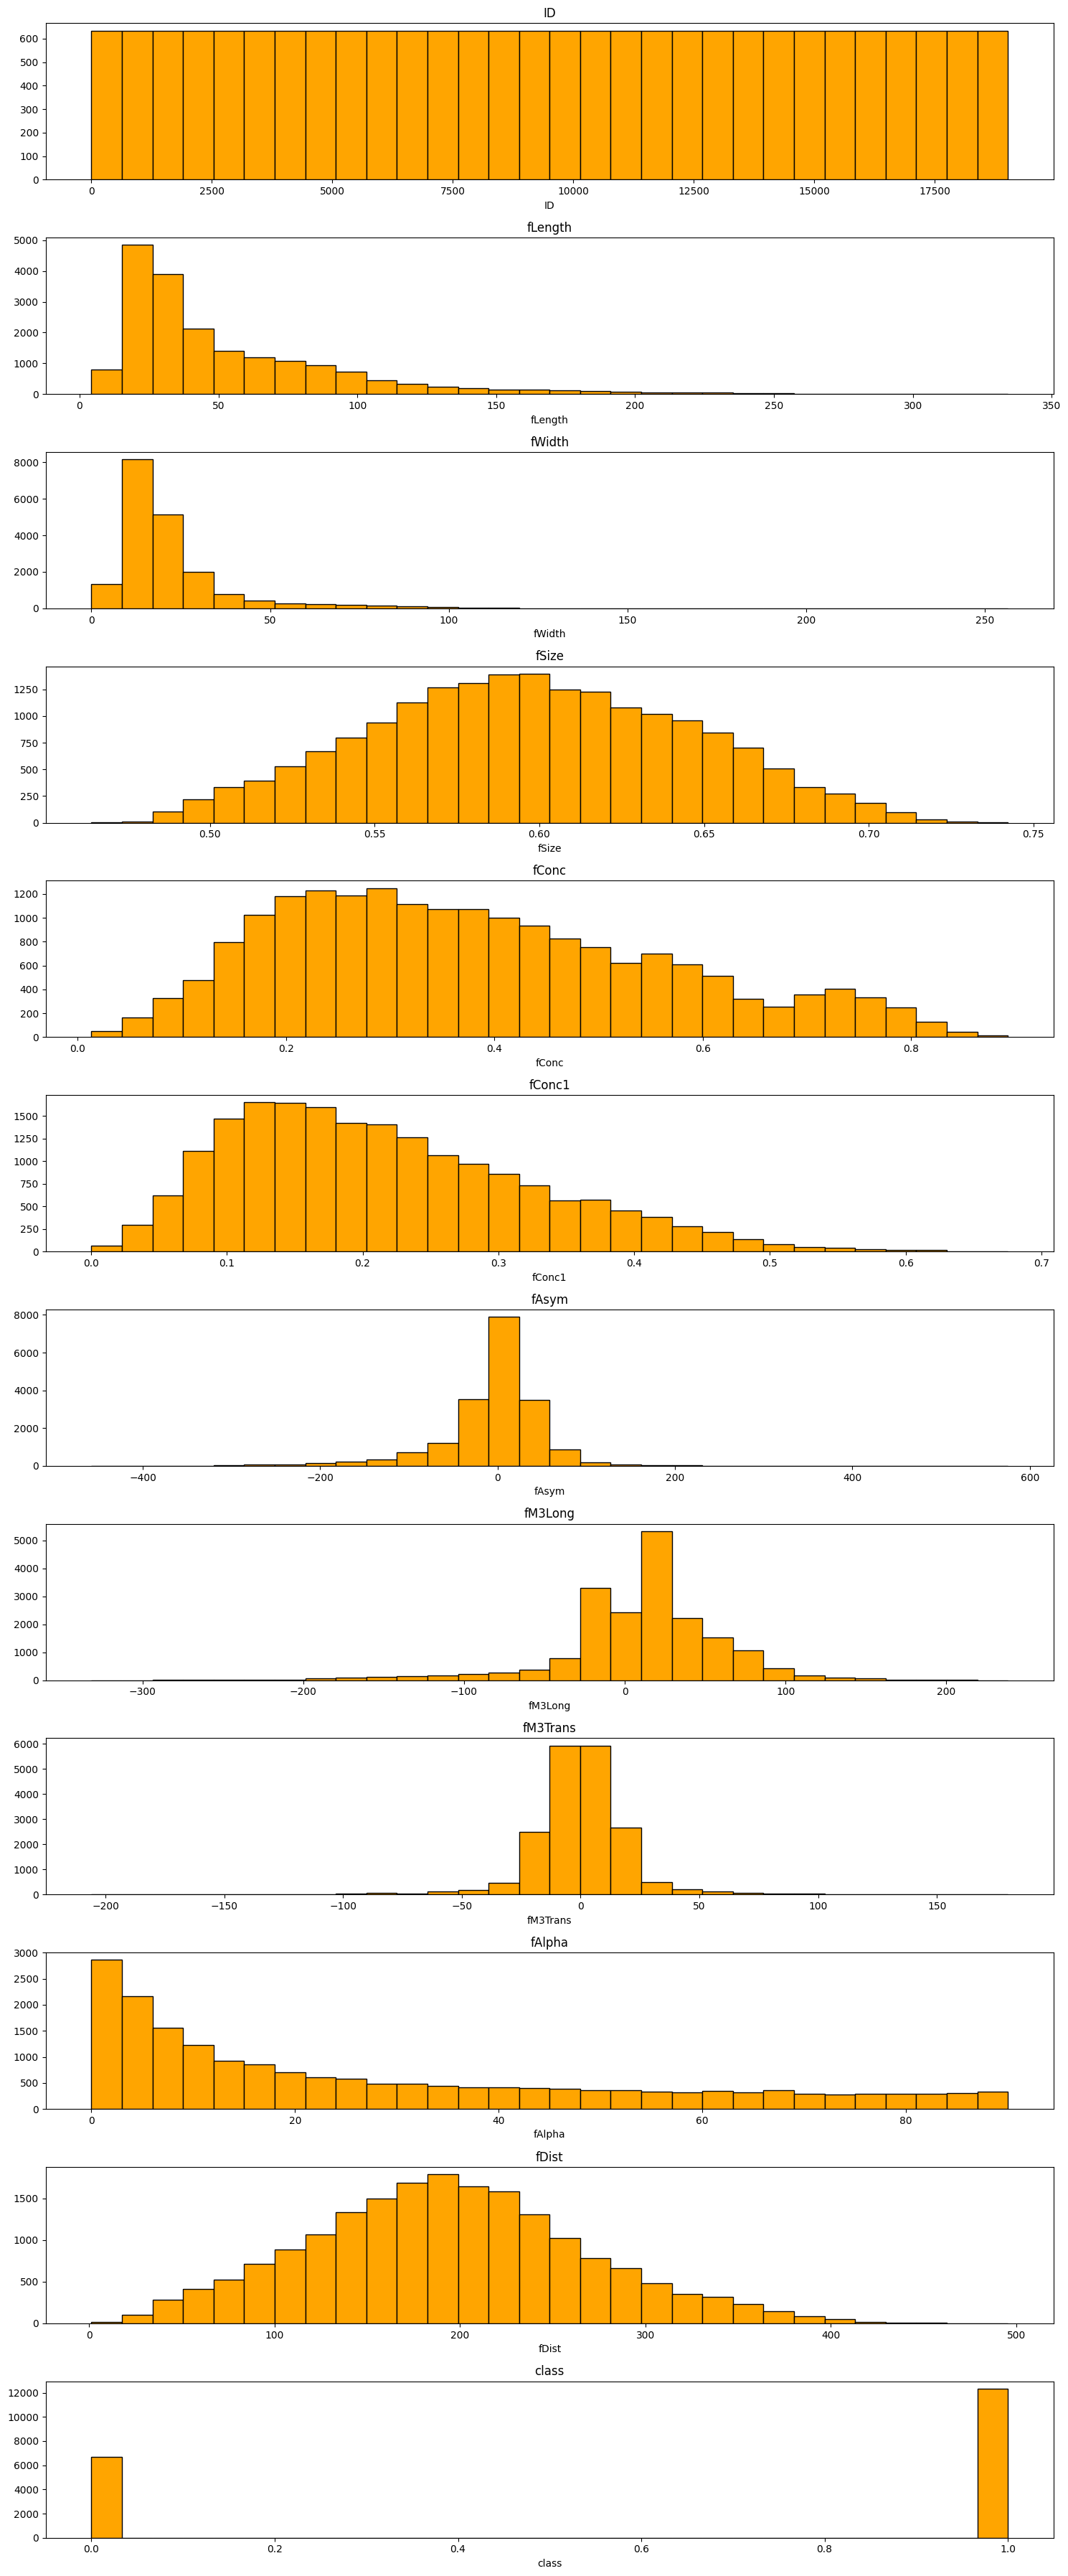

In [136]:
plt.figure(figsize=(15, len(cols) * 3))

for i, col in enumerate(cols, 1):
    plt.subplot(len(cols), 1, i)
    plt.hist(df[col].dropna(), bins=30, color = "orange", edgecolor='black')
    plt.title(col)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

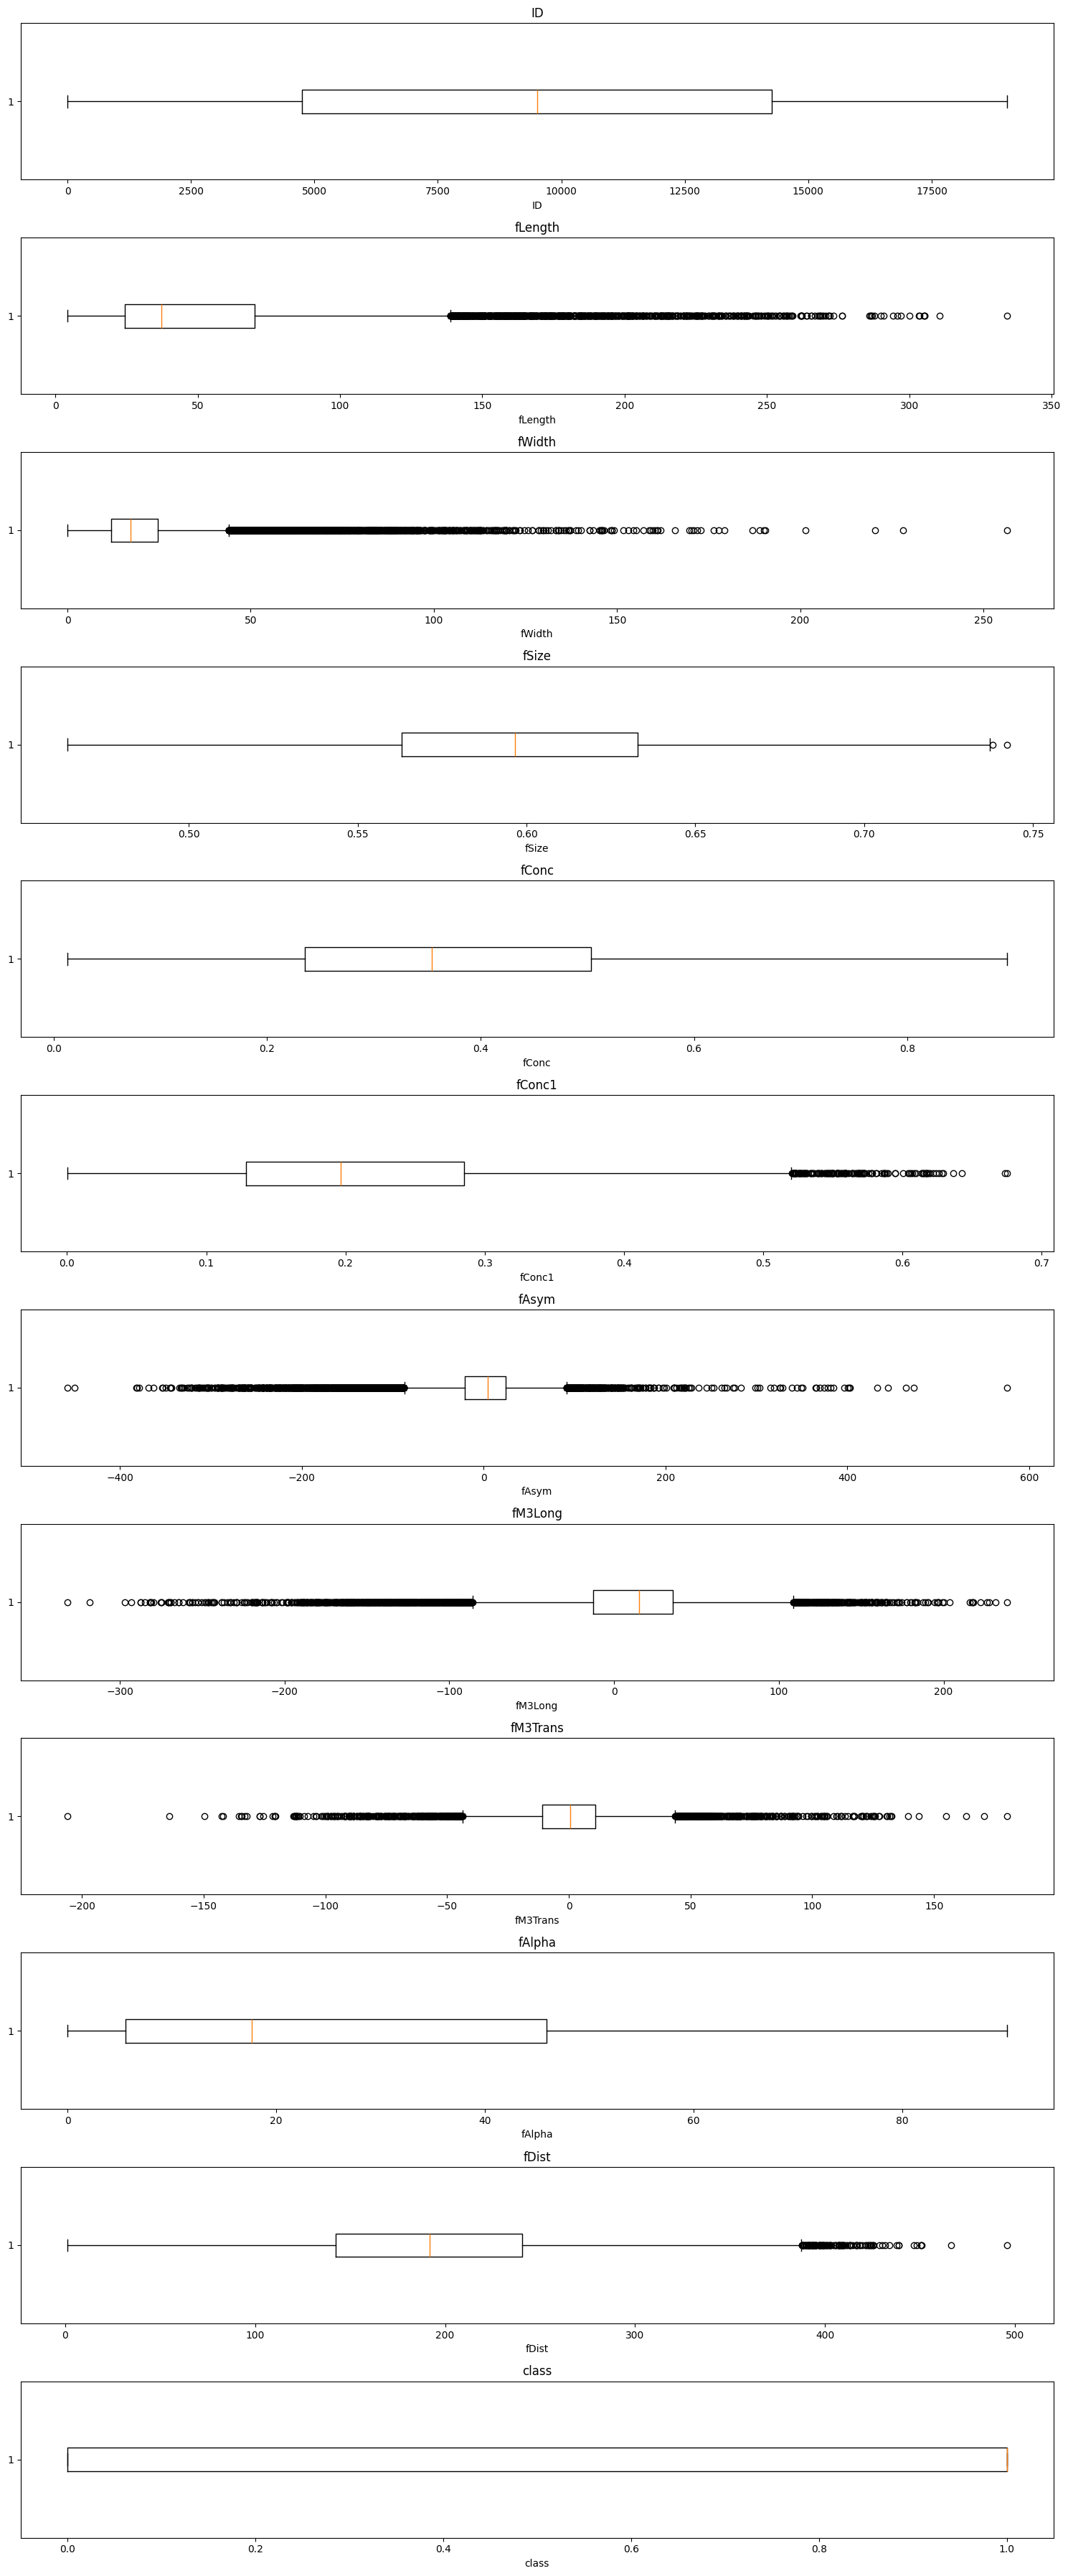

In [137]:
plt.figure(figsize=(15, len(cols) * 3))

for i, col in enumerate(cols, 1):
    plt.subplot(len(cols), 1, i)
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(col)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [138]:
numeric_df = df.select_dtypes(include=[np.number])

for col in numeric_df.columns:
    stat, p = shapiro(df[col])
    print(p)

2.268443853164685e-59
8.133404060550683e-93
1.5423236511023563e-103
3.5564780522027773e-25
1.0260738464095494e-52
3.0703986576980104e-56
4.133179728229826e-84
1.4561558074025387e-72
1.0034033956235664e-78
6.257989223858619e-82
3.562749318318082e-25
1.0304298450095123e-108


c:\Users\matej\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19020.
  res = hypotest_fun_out(*samples, **kwds)


In [139]:
outliers_count = {}

for col in numeric_df.columns:
    Q1 = numeric_df[col].quantile(0.25)
    Q3 = numeric_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    count = numeric_df[(numeric_df[col] < lower_bound) | (numeric_df[col] > upper_bound)][col].count()
    outliers_count[col] = count

outliers_df = pd.DataFrame(list(outliers_count.items()), columns=['Column', 'Outliers_Count'])
outliers_df = outliers_df.sort_values(by='Outliers_Count', ascending=False)

print(outliers_df)

      Column  Outliers_Count
6      fAsym            1781
2     fWidth            1546
7    fM3Long            1218
1    fLength             971
8   fM3Trans             850
5     fConc1             150
10     fDist             128
3      fSize               2
0         ID               0
4      fConc               0
9     fAlpha               0
11     class               0


For me it's a big problem to figure out what to do with outlires because it's our data and we can't just throw it away if we aren't sure that it has som problems. I have used boxcox to minimize influence and reduce amount of oulires in fSz.

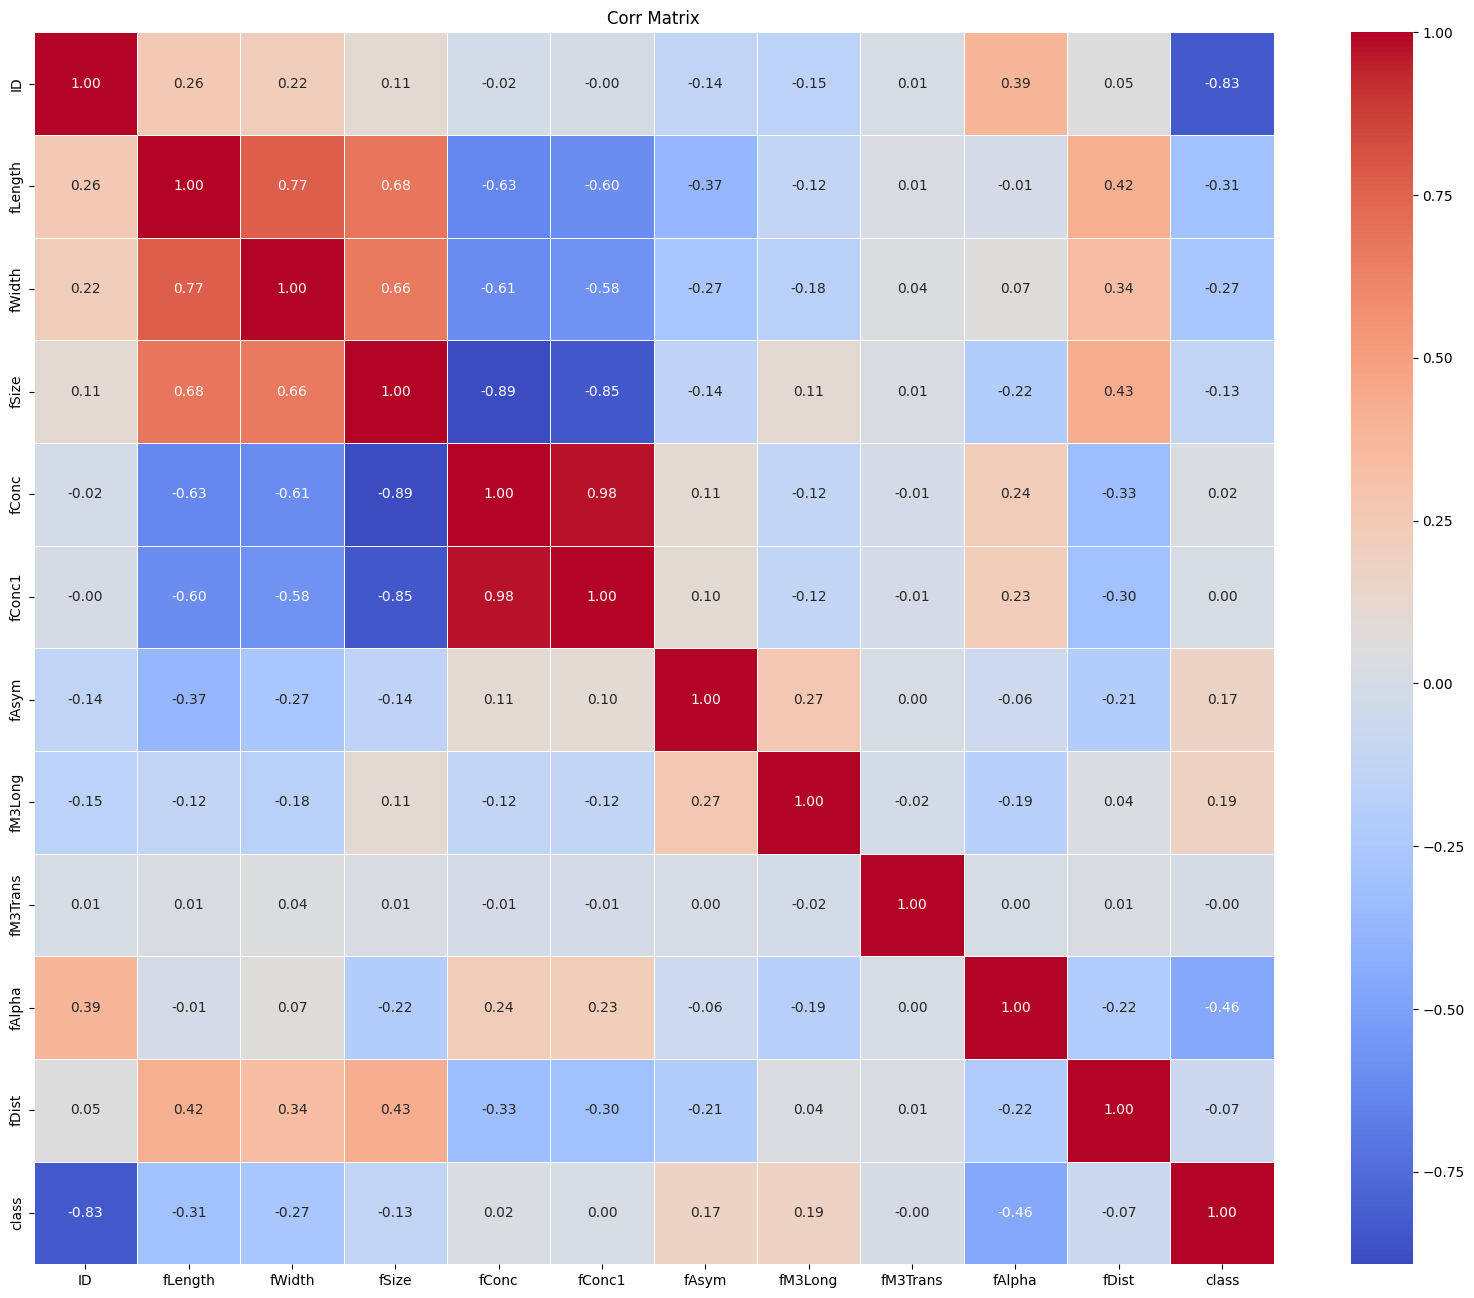

In [140]:
relationships_matrix = numeric_df.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(relationships_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Corr Matrix')
plt.show()

In [141]:
# Helper function: Cohen's d effect size
def cohend(d1, d2):
    """
    Calculate Cohen's d for independent samples.
    d1, d2: array-like data for two groups
    Returns: Cohen's d value (standardized mean difference)
    """
    from numpy import var, sqrt, mean
    
    # calculate the size of samples
    n1, n2 = len(d1), len(d2)
    
    # calculate the variance of the samples
    s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
    
    # calculate the pooled standard deviation
    s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    
    # calculate the means of the samples
    u1, u2 = mean(d1), mean(d2)
    
    # calculate the effect size
    return (u1 - u2) / s

c:\Users\matej\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12332.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\matej\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6688.
  res = hypotest_fun_out(*samples, **kwds)


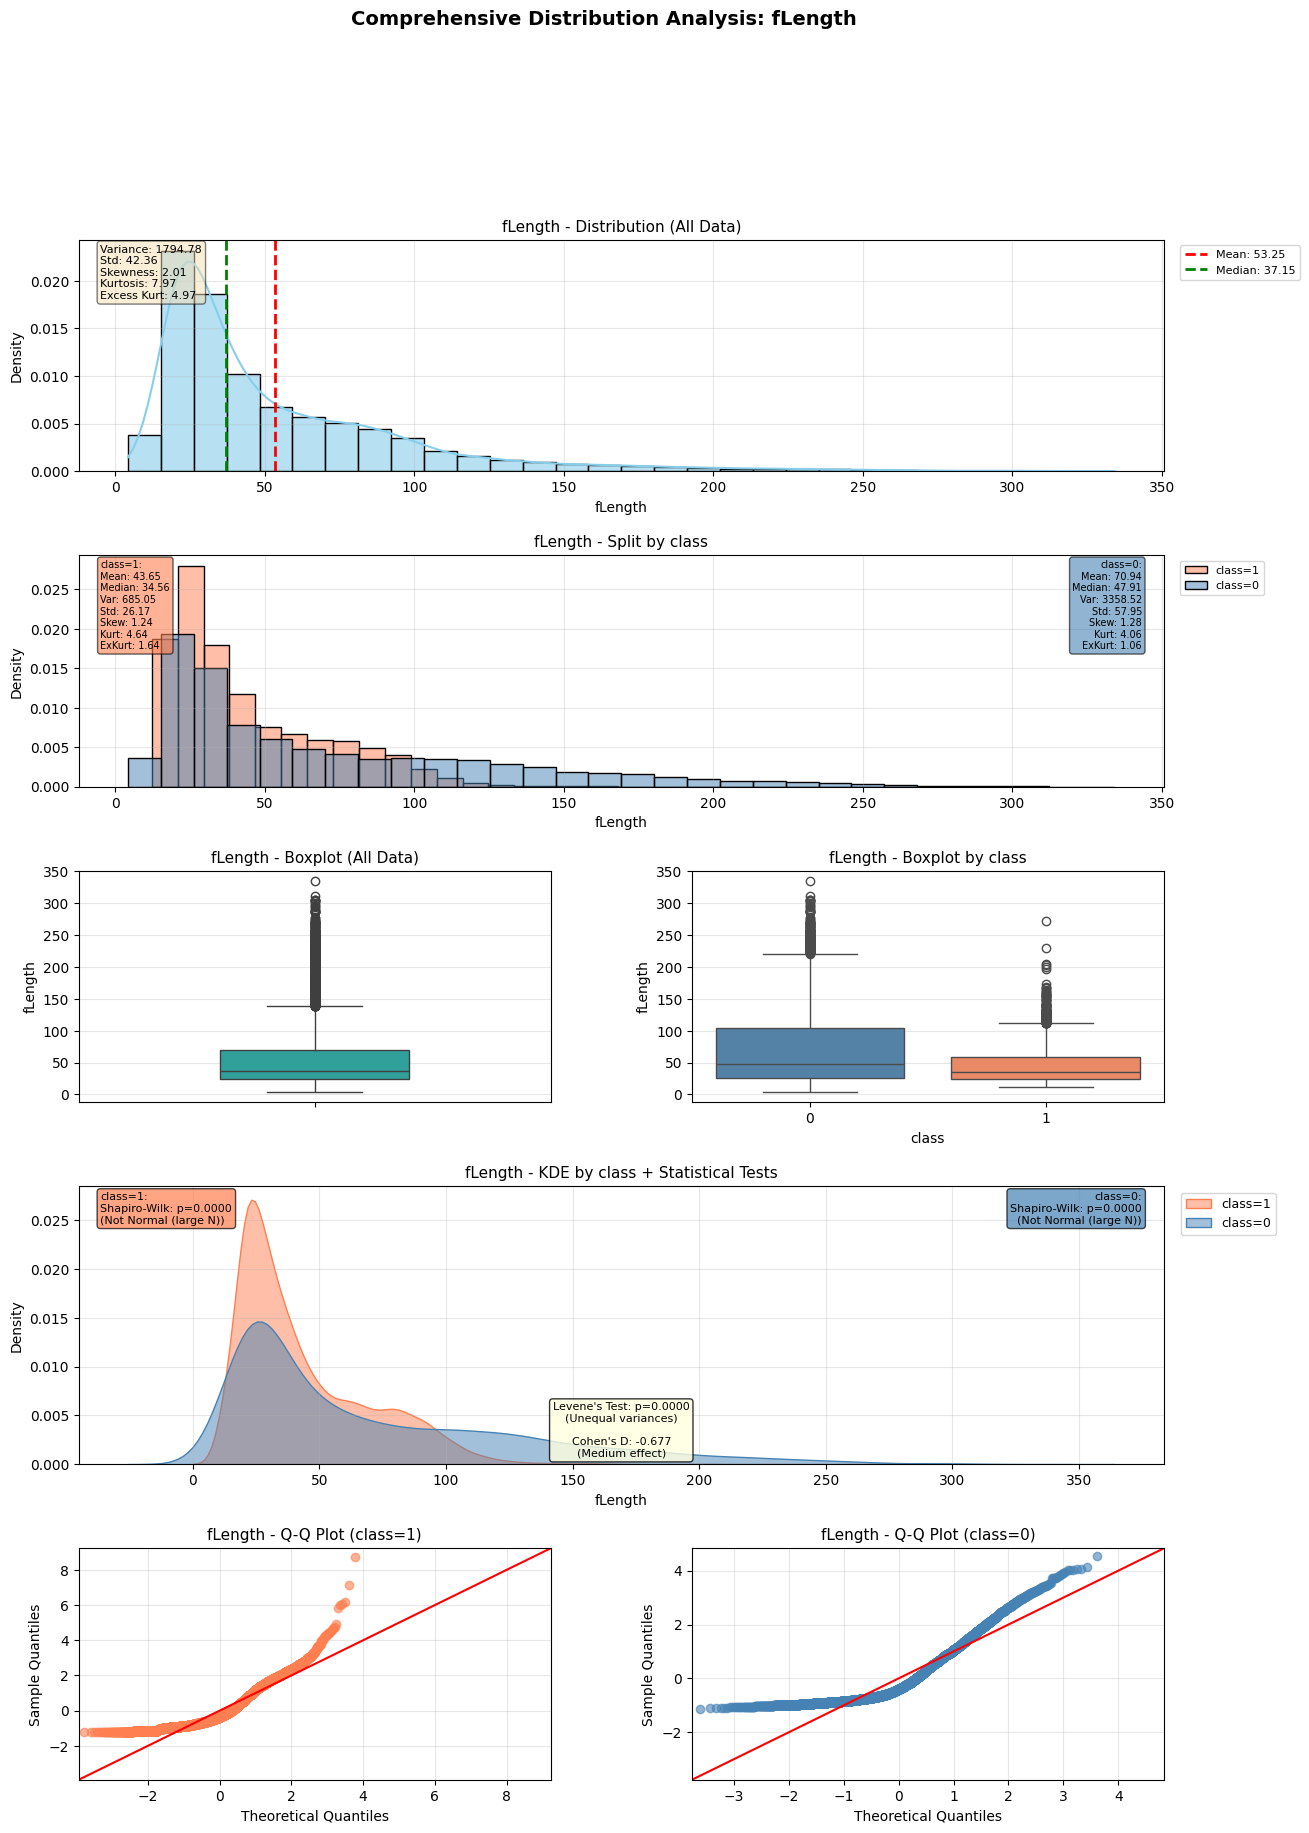

c:\Users\matej\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12332.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\matej\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6688.
  res = hypotest_fun_out(*samples, **kwds)


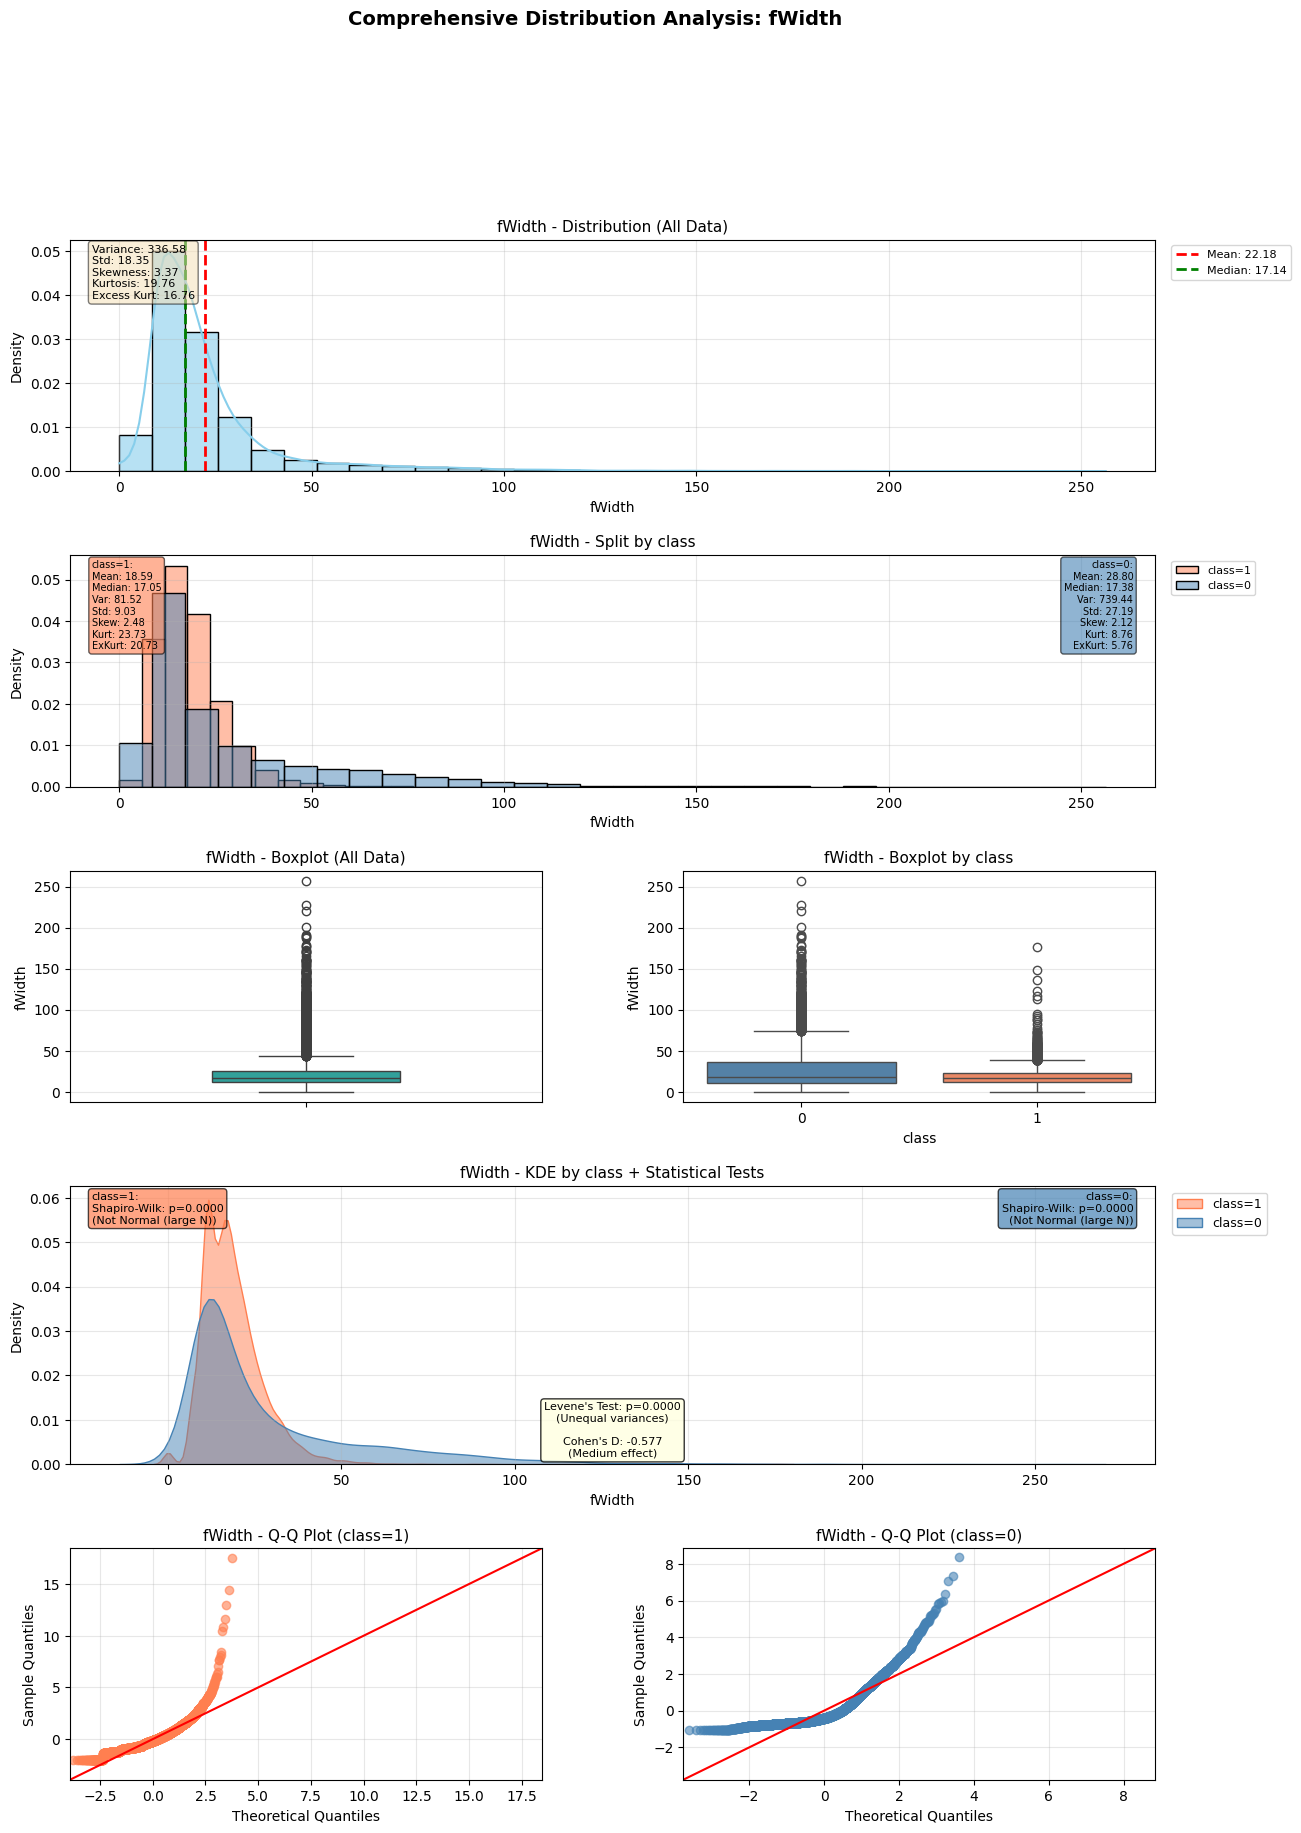

c:\Users\matej\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12332.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\matej\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6688.
  res = hypotest_fun_out(*samples, **kwds)


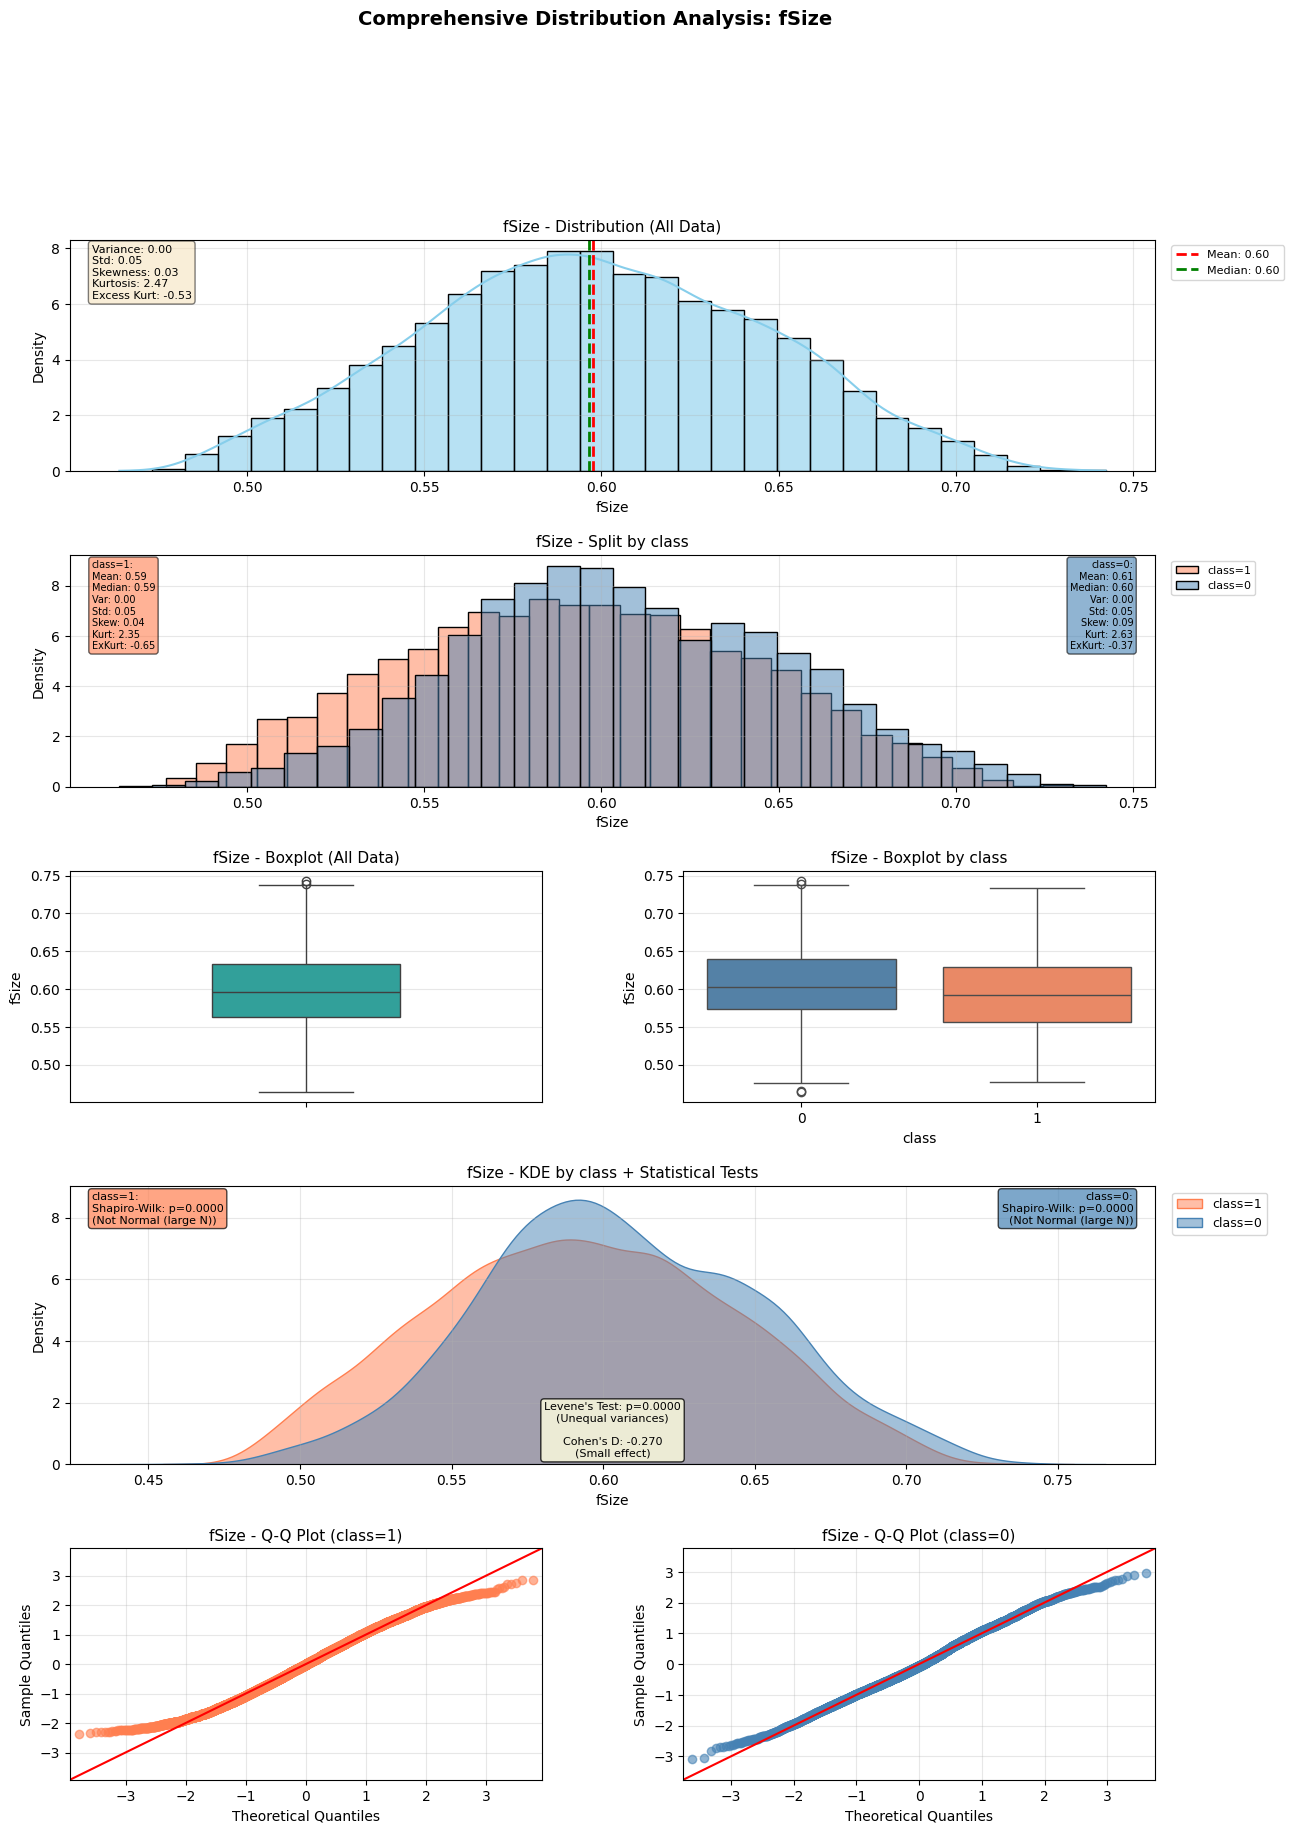

c:\Users\matej\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12332.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\matej\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6688.
  res = hypotest_fun_out(*samples, **kwds)


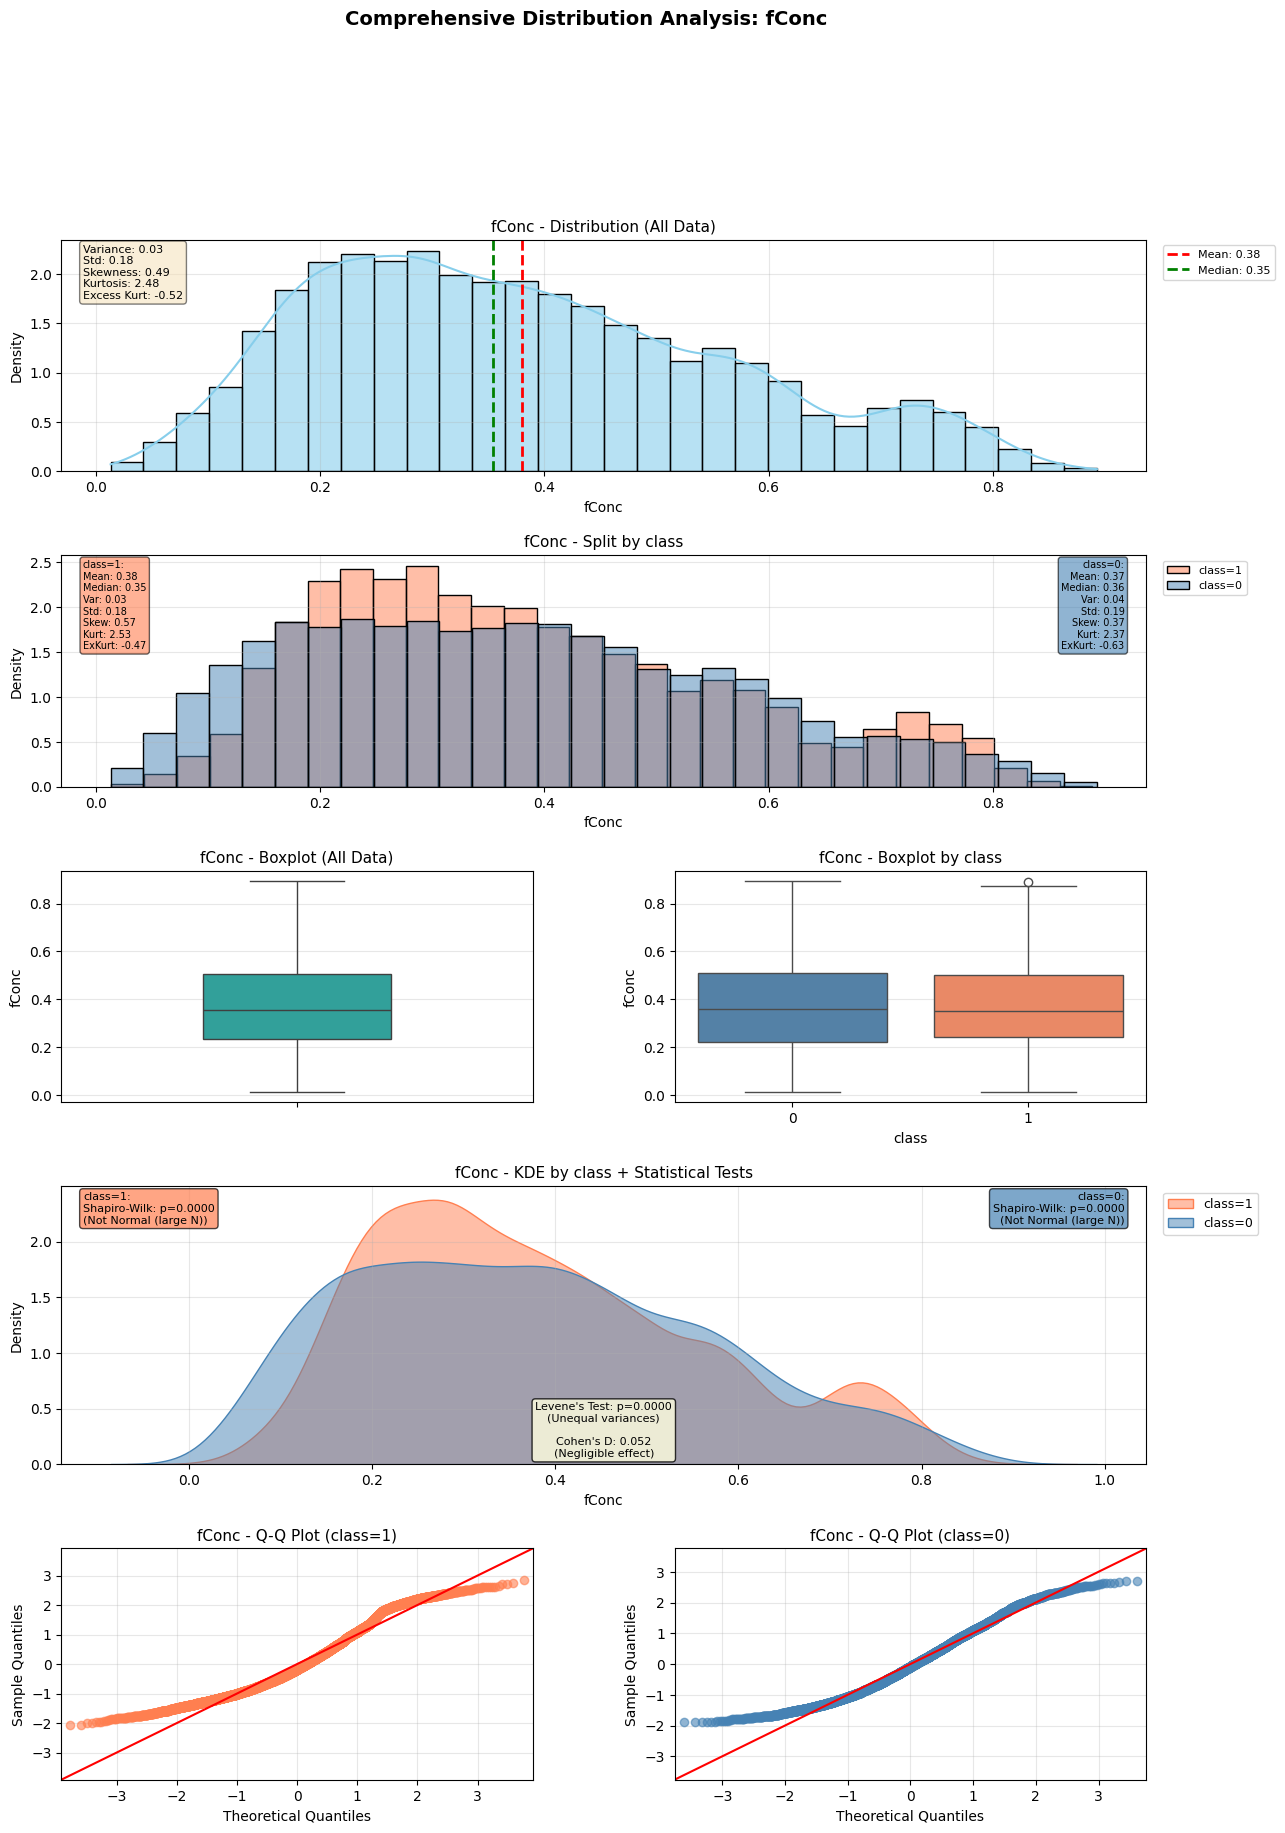

c:\Users\matej\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12332.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\matej\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6688.
  res = hypotest_fun_out(*samples, **kwds)


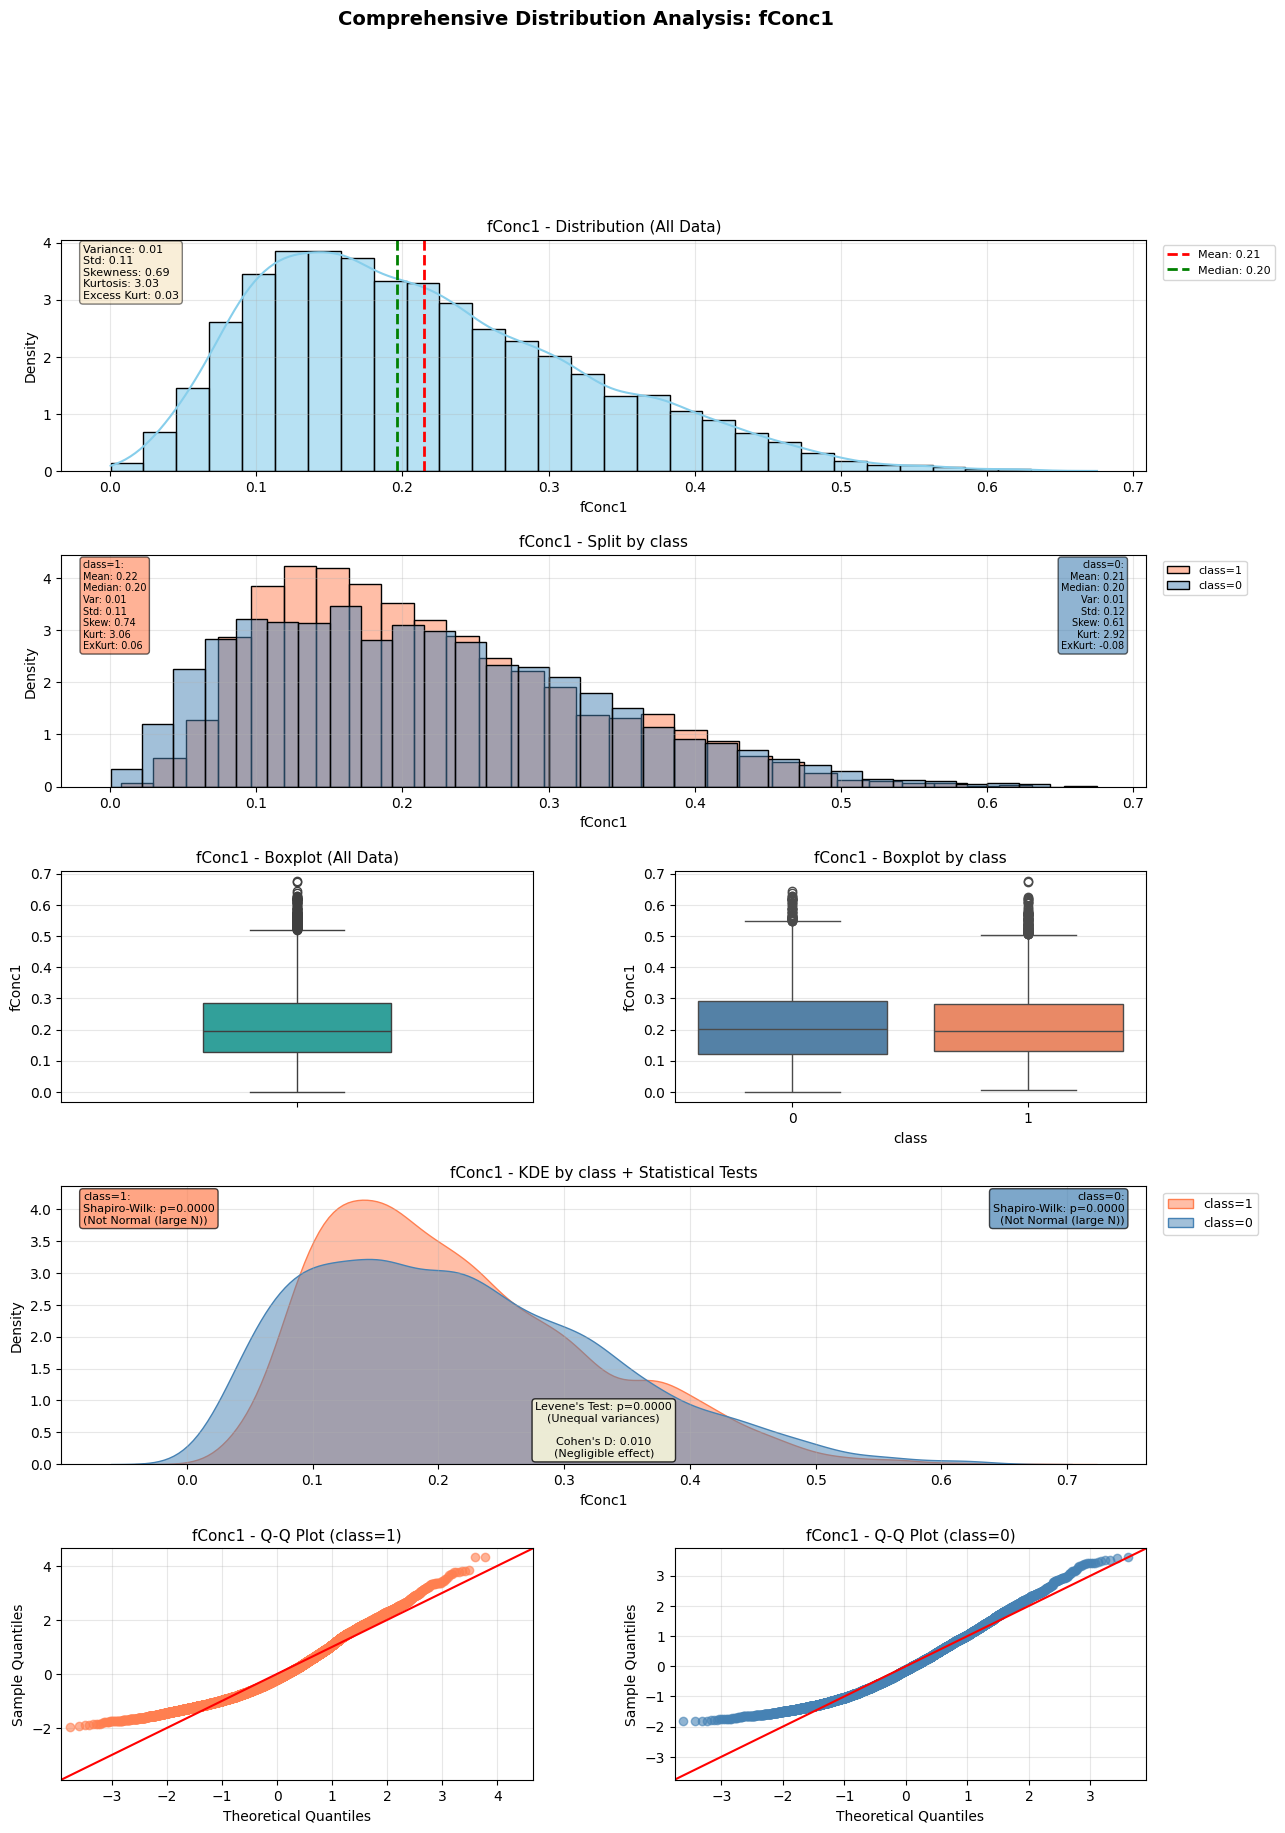

c:\Users\matej\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12332.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\matej\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6688.
  res = hypotest_fun_out(*samples, **kwds)


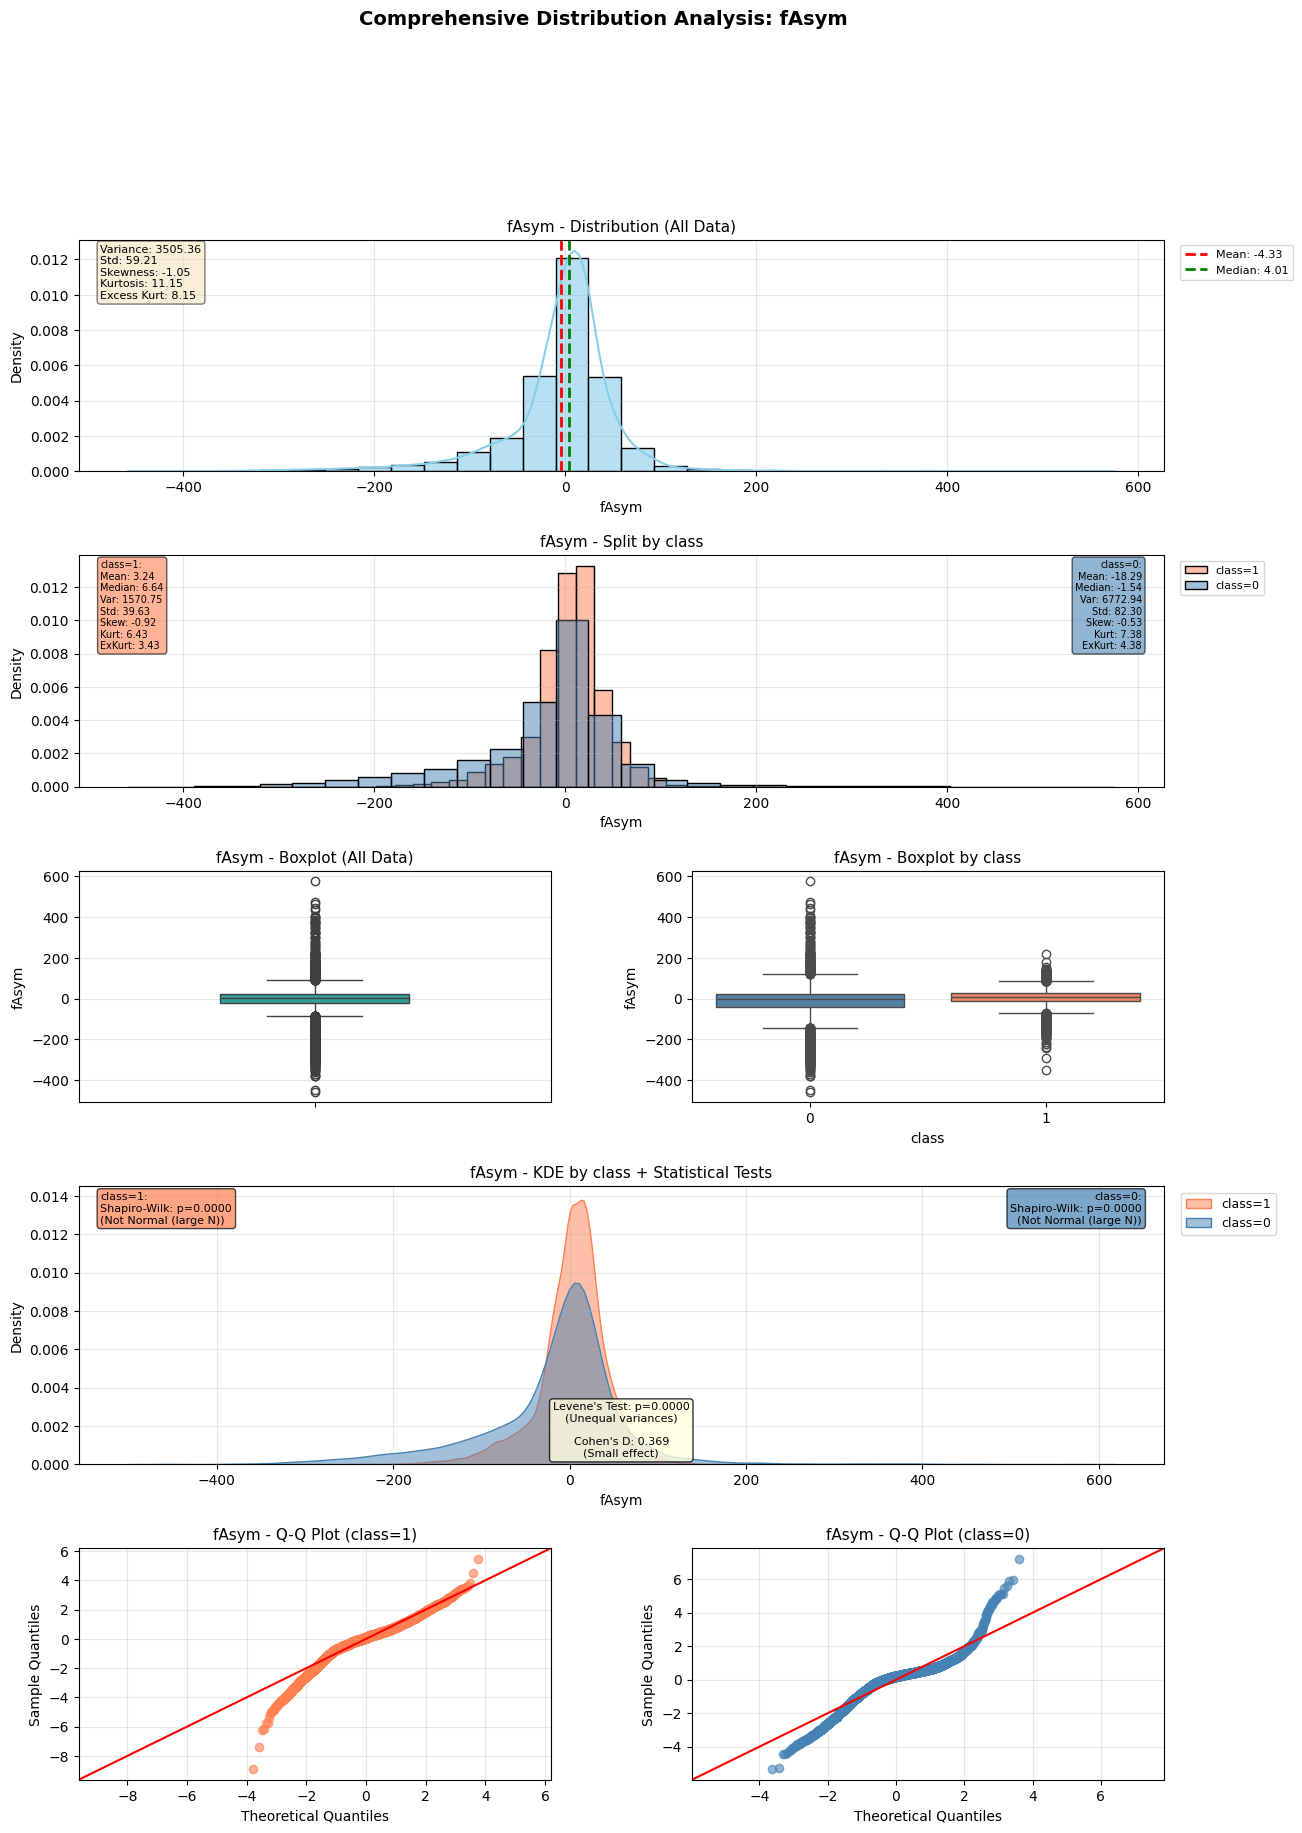

c:\Users\matej\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12332.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\matej\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6688.
  res = hypotest_fun_out(*samples, **kwds)


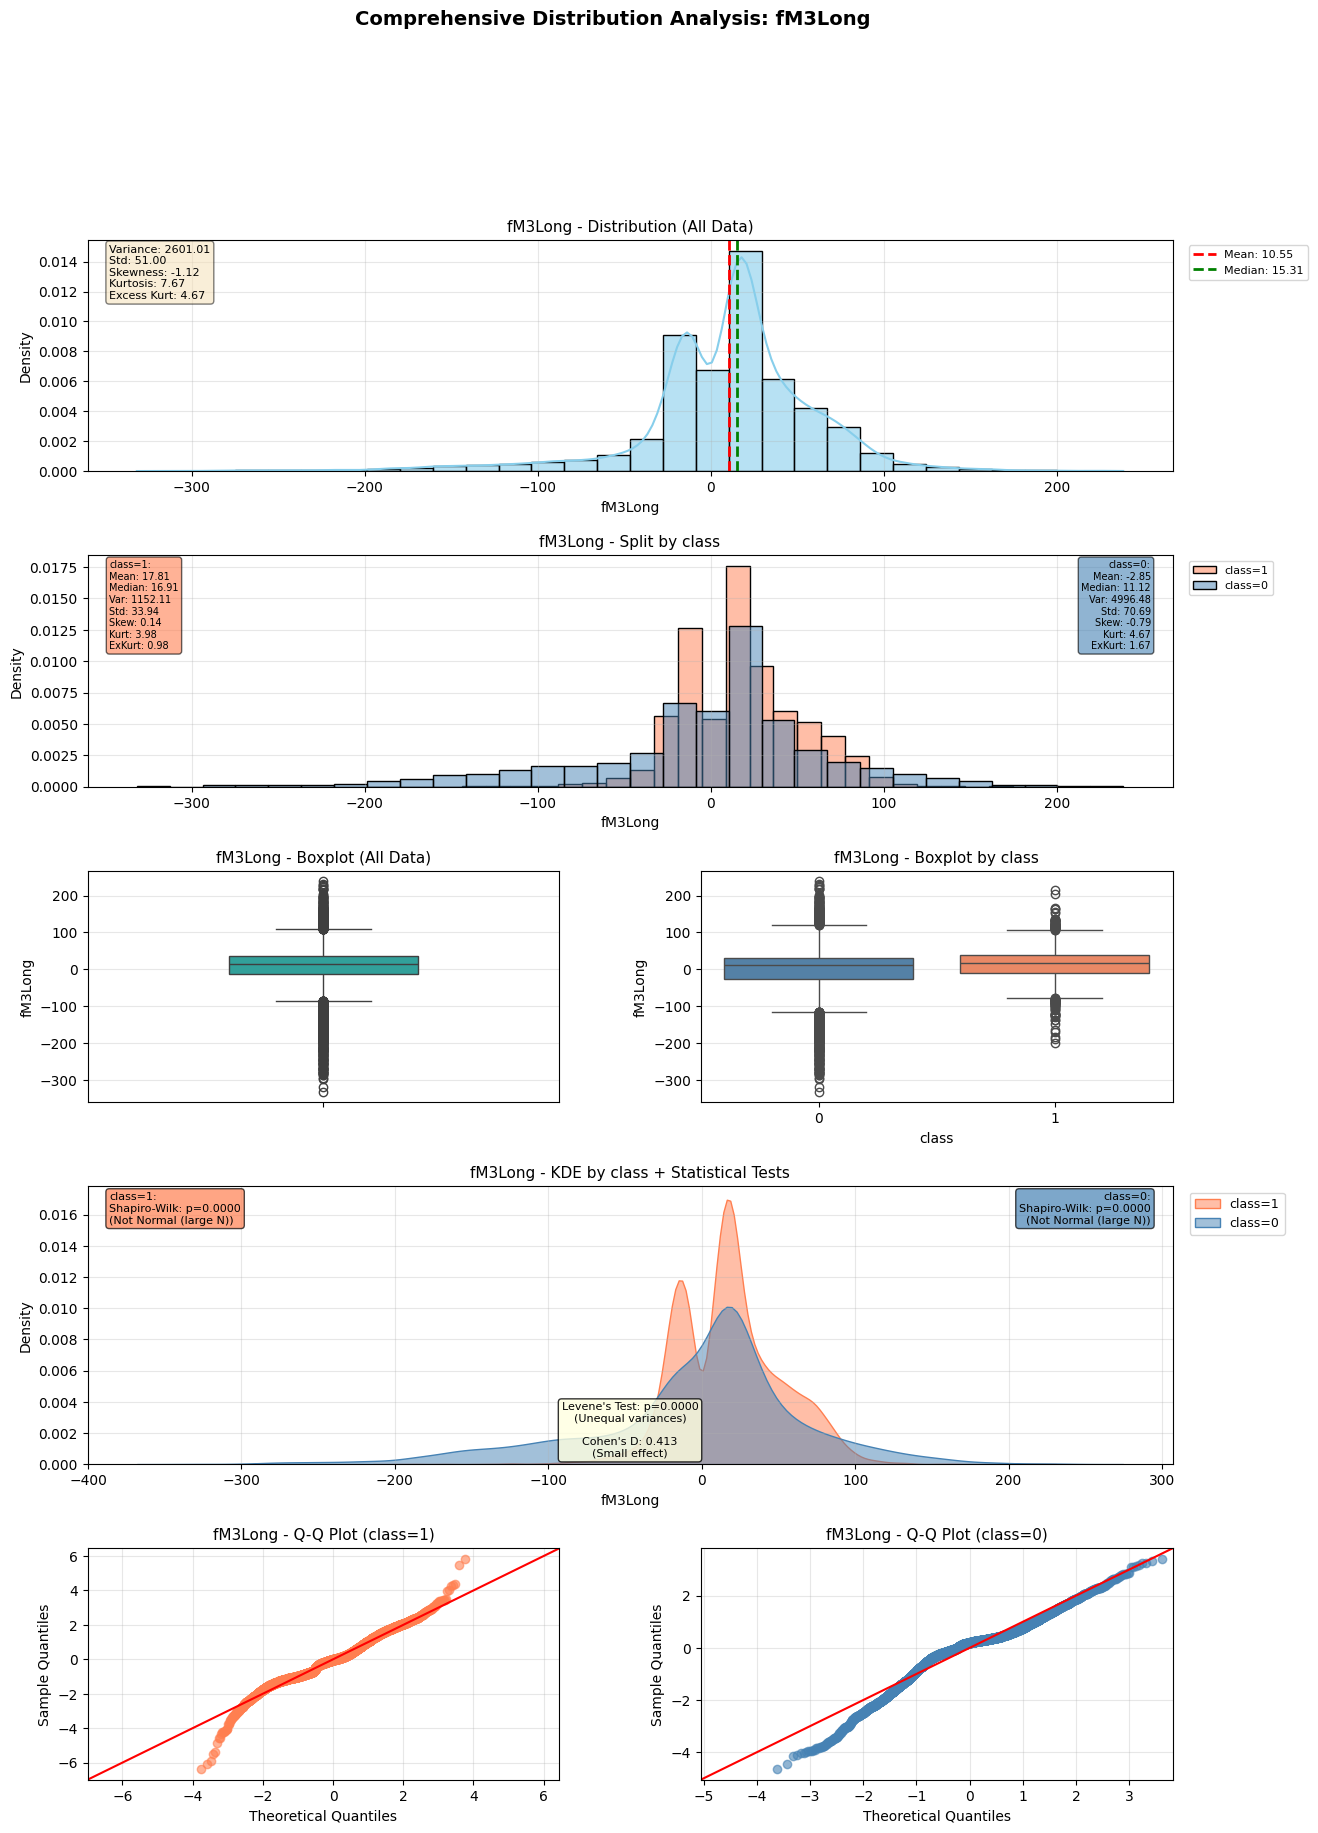

c:\Users\matej\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12332.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\matej\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6688.
  res = hypotest_fun_out(*samples, **kwds)


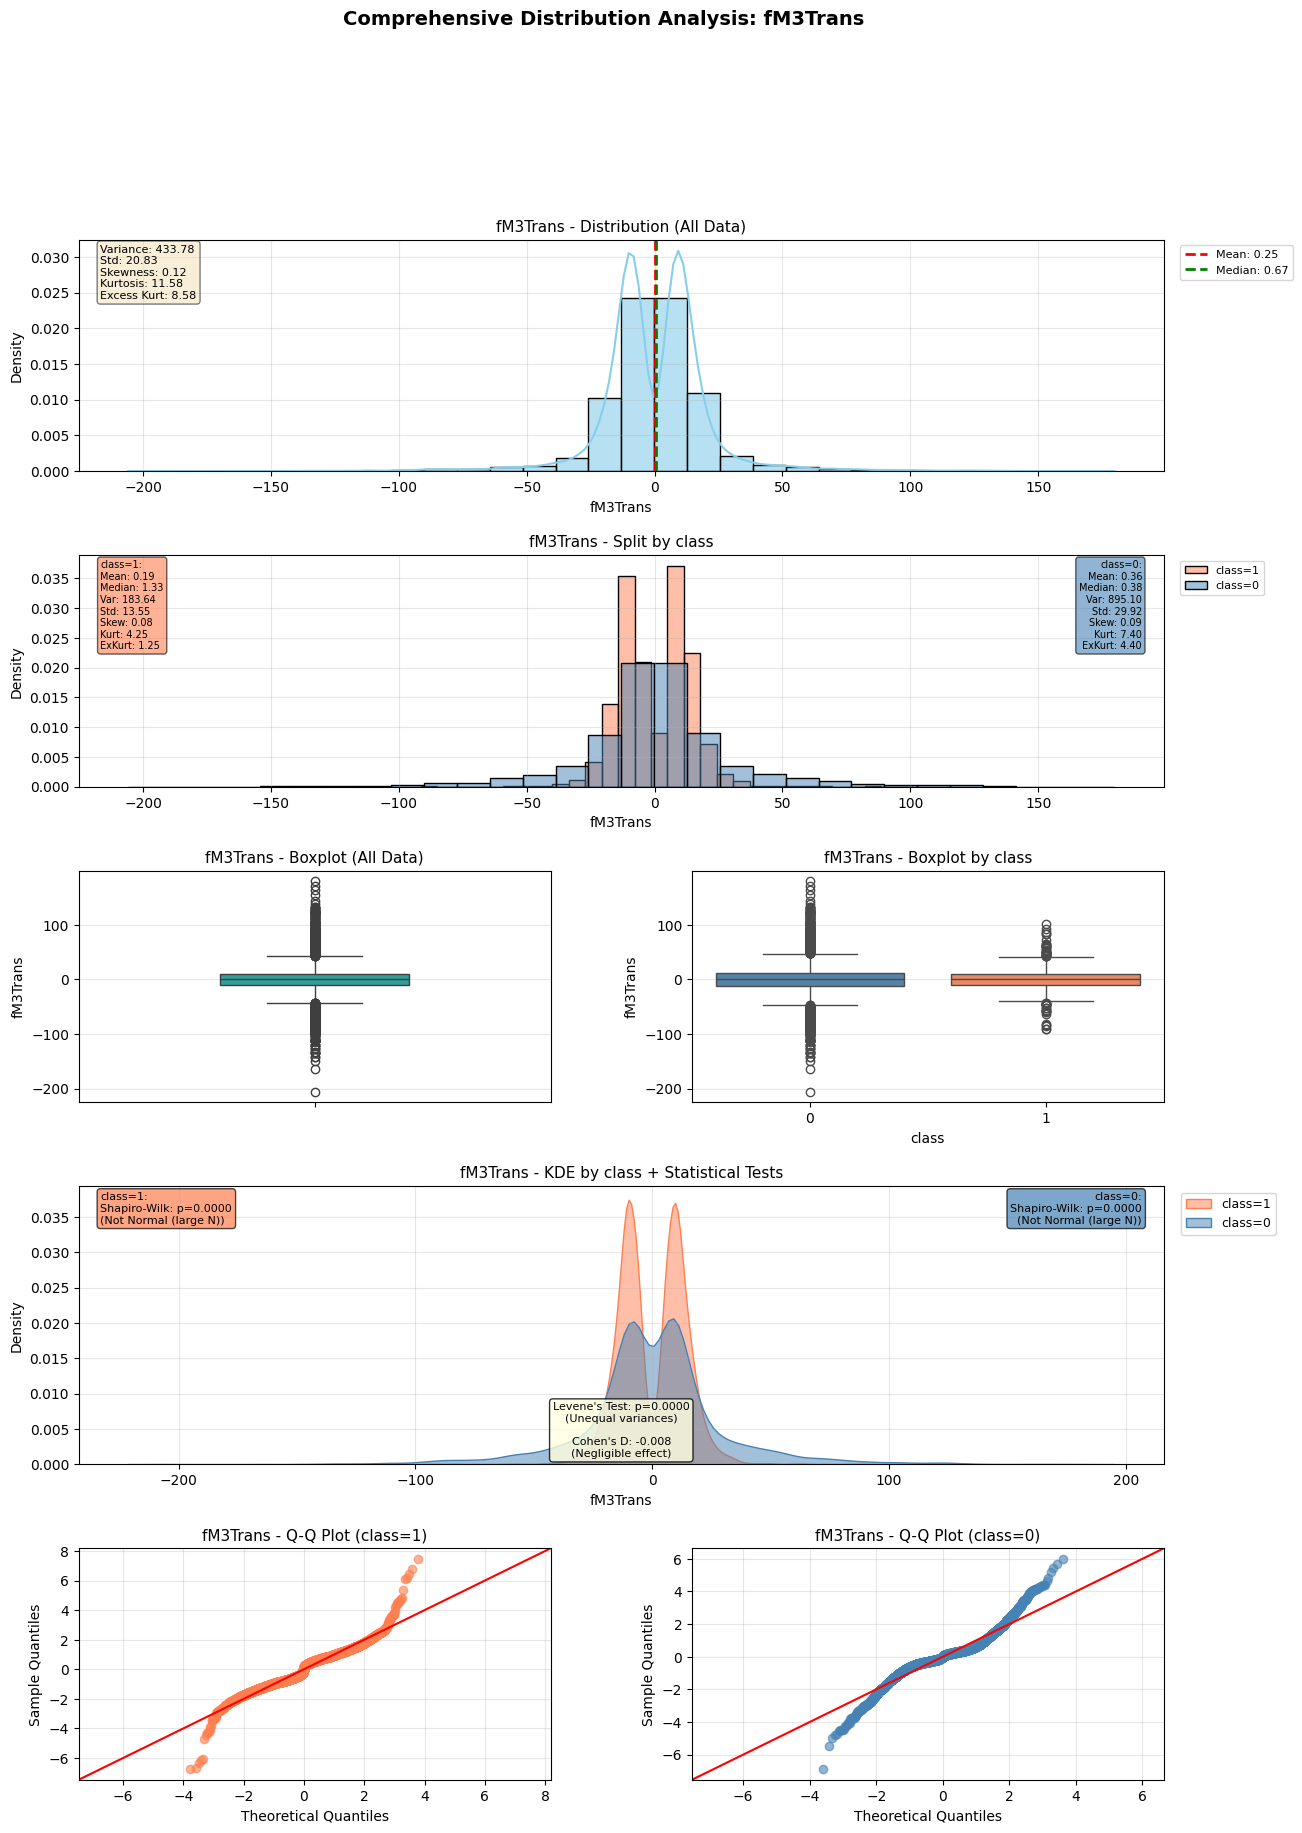

c:\Users\matej\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12332.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\matej\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6688.
  res = hypotest_fun_out(*samples, **kwds)


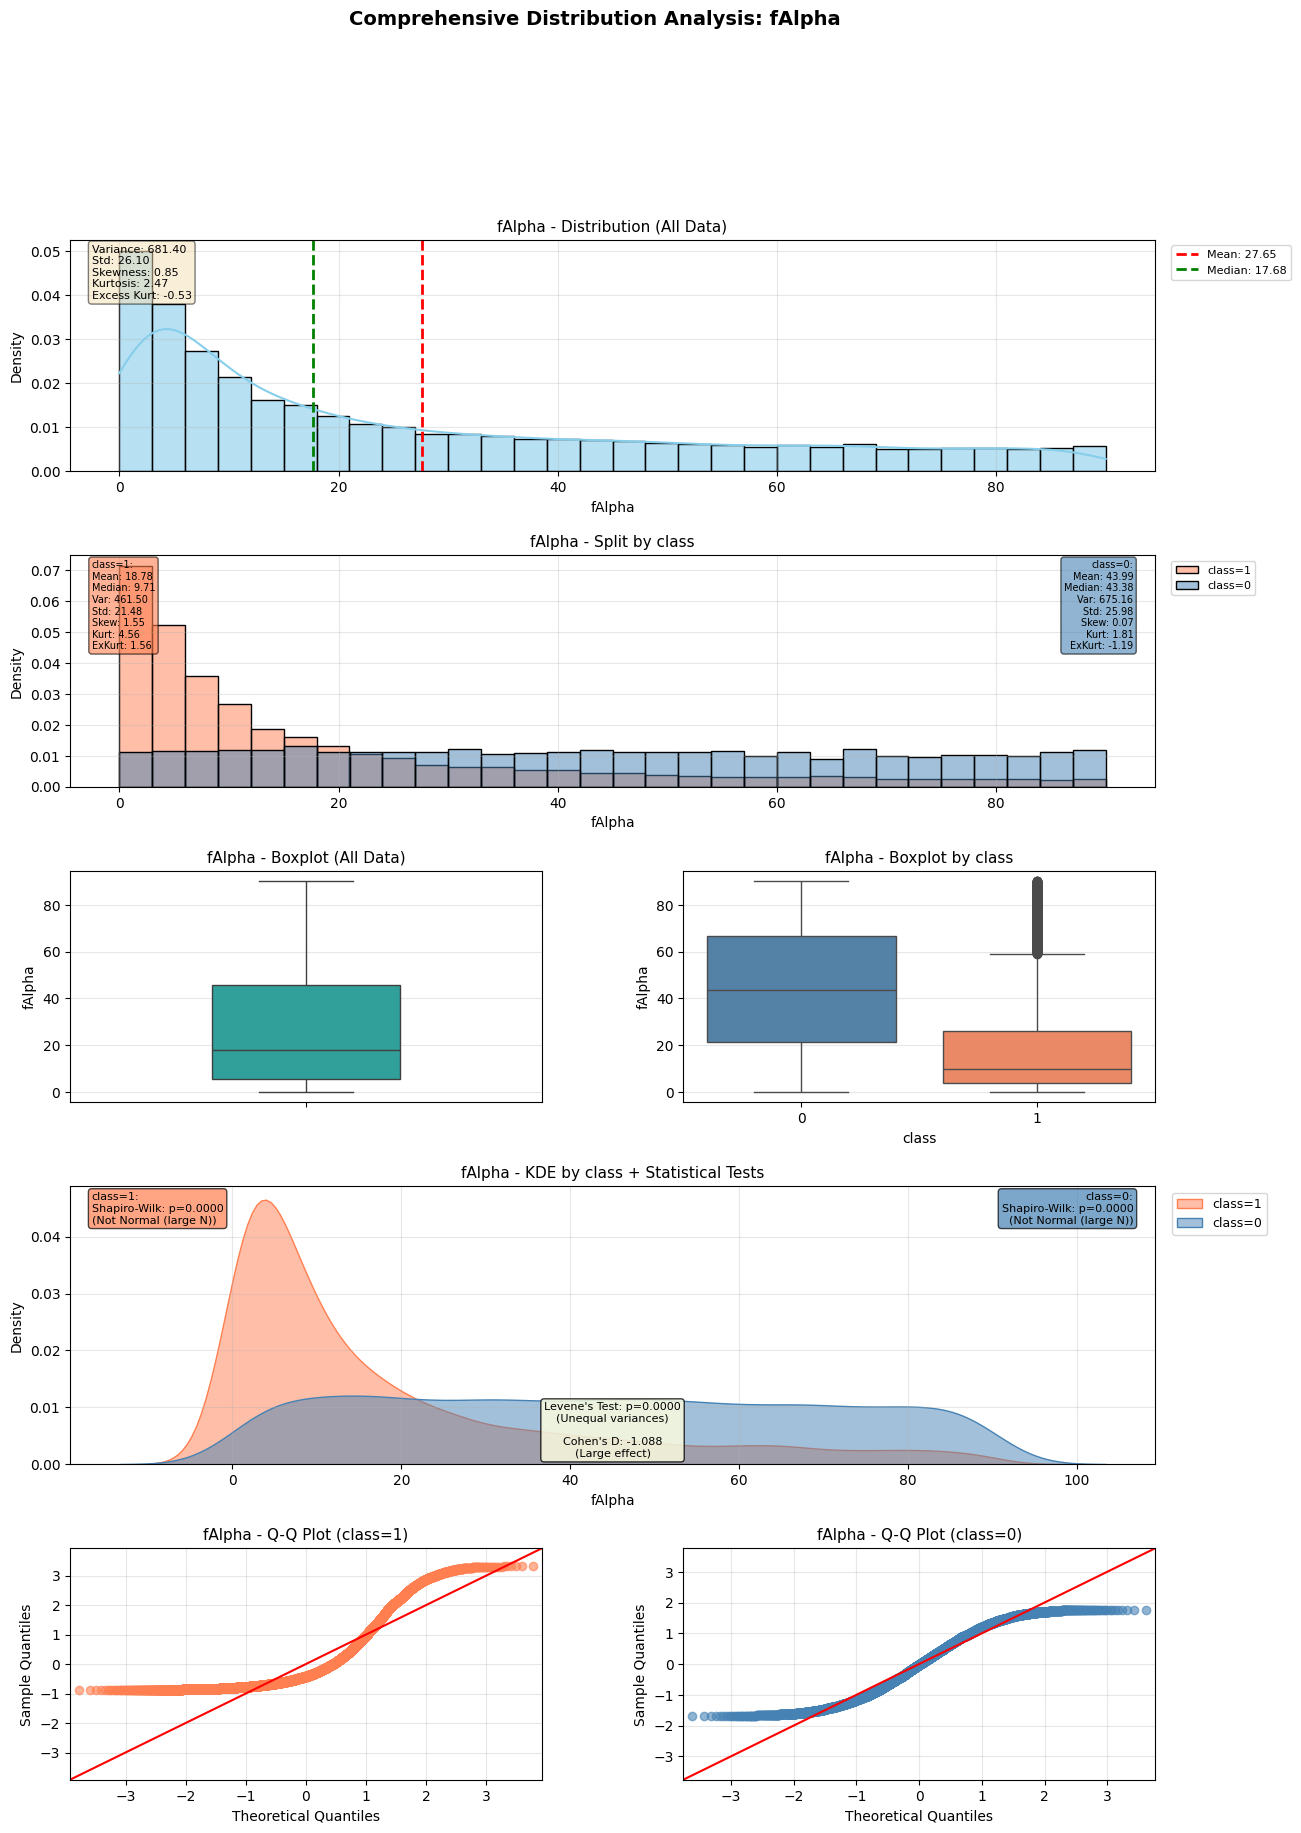

c:\Users\matej\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12332.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\matej\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6688.
  res = hypotest_fun_out(*samples, **kwds)


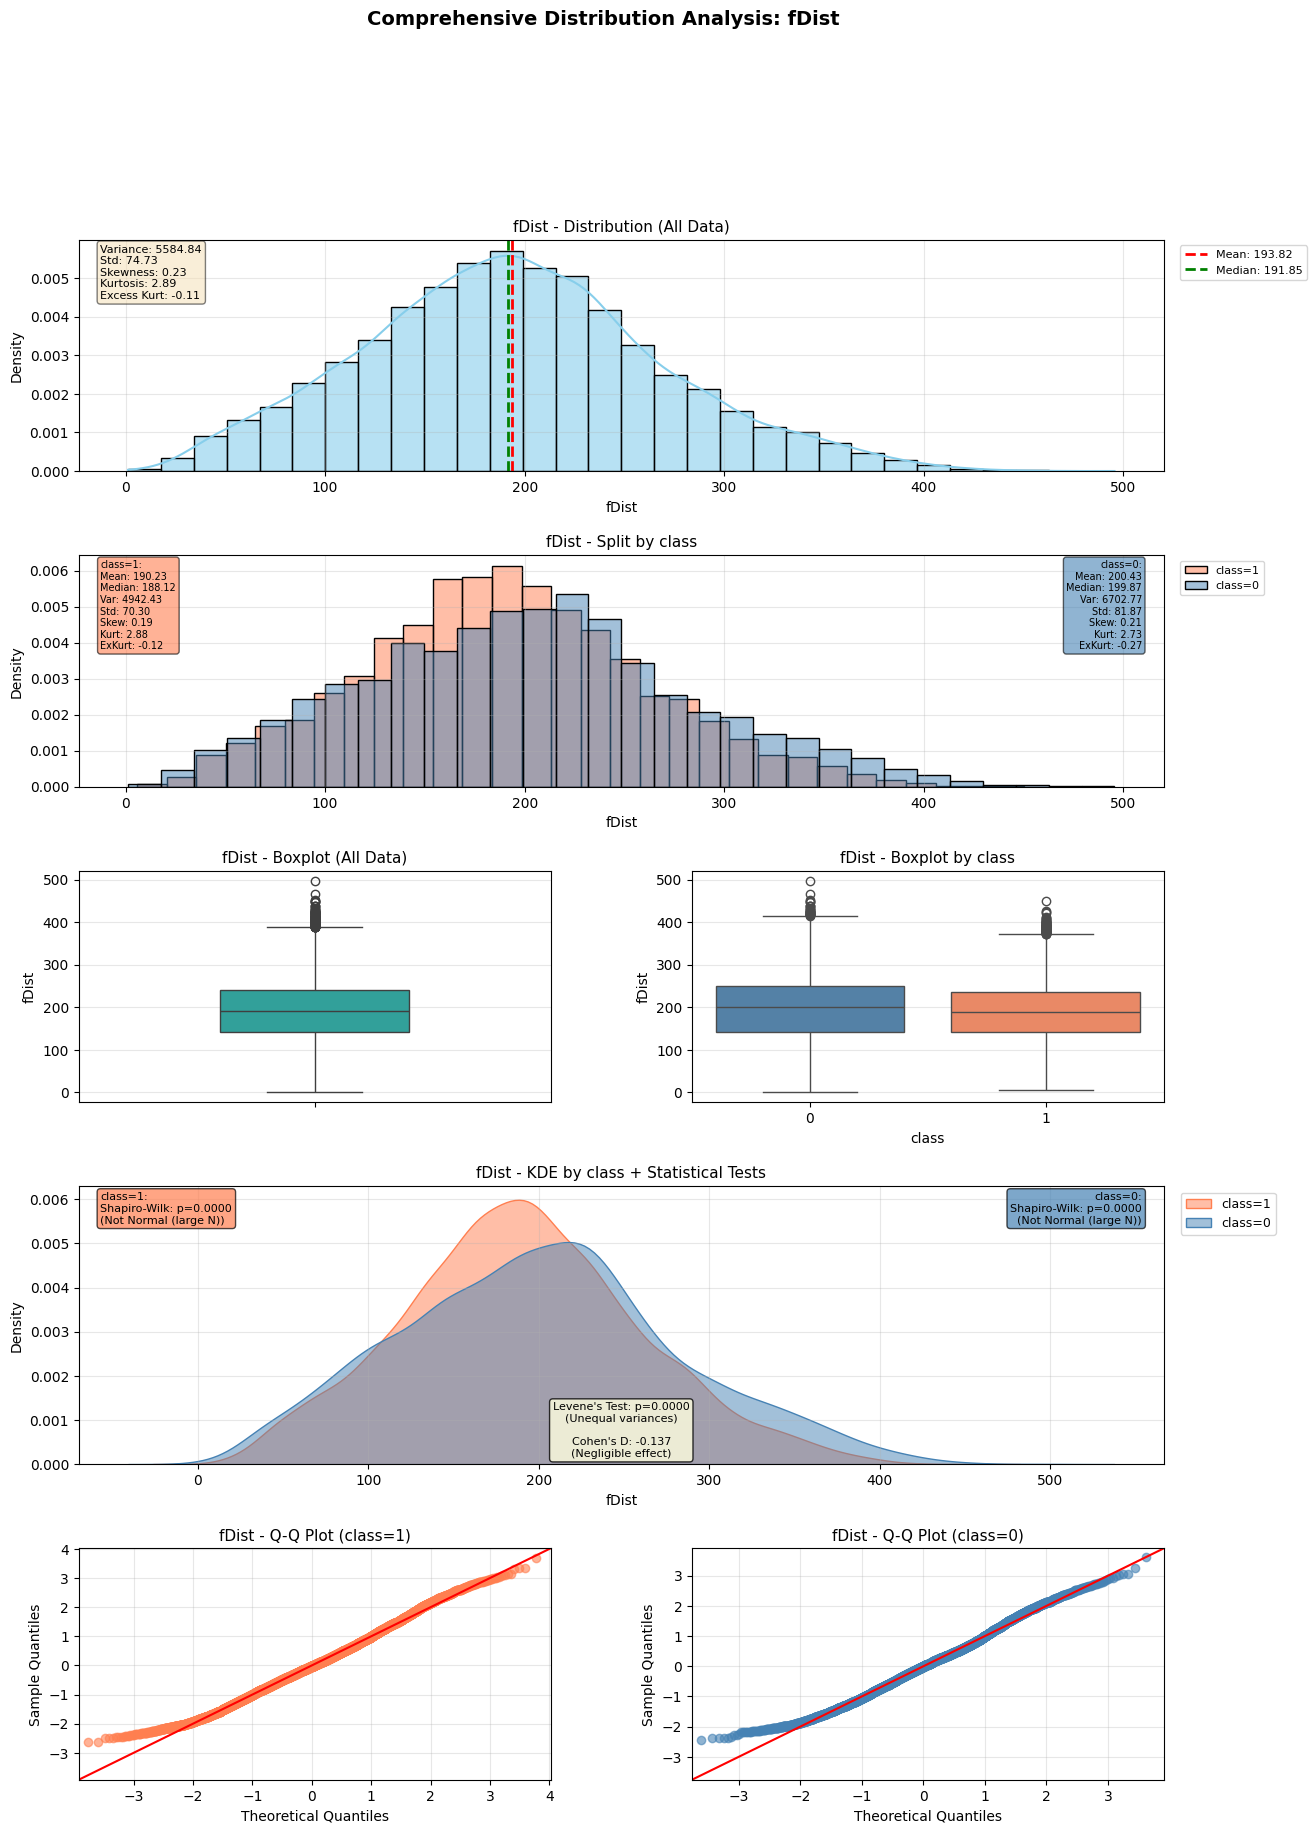

In [142]:
import statsmodels.api as sm

# Extract columns (excluding 'class')
cols_to_visualize = [c for c in df.columns if c != 'class']

for col in cols_to_visualize:
    # Skip non-numeric columns
    if df[col].dtype not in [np.float64, np.int64, np.float32, np.int32]:
        continue
    if col in ['ID', 'class']:  # skip identifier columns
        continue


    # Prepare data
    data_all = df[col].dropna()
    data_g = df[df['class'] == 1][col].dropna()  # class=1 ('g')
    data_h = df[df['class'] == 0][col].dropna()  # class=0 ('h')
    
    # Skip if insufficient data
    if len(data_g) < 3 or len(data_h) < 3:
        continue
    
    # Create figure with GridSpec (5 rows)
    fig = plt.figure(figsize=(14, 20))
    gs = fig.add_gridspec(5, 2, height_ratios=[1, 1, 1, 1.2, 1], hspace=0.35, wspace=0.3)
    
    # ========== ROW 1: Histogram + KDE + Mean/Median lines (full width) ==========
    ax1 = fig.add_subplot(gs[0, :])
    sns.histplot(data_all, bins=30, kde=True, color='skyblue', ax=ax1, stat='density', alpha=0.6)
    
    # Calculate statistics
    mean_all = data_all.mean()
    median_all = data_all.median()
    variance_all = data_all.var()
    std_all = data_all.std()
    skewness_all = stats.skew(data_all)
    kurt_all = stats.kurtosis(data_all, fisher=False)  # regular kurtosis
    excess_kurt_all = stats.kurtosis(data_all, fisher=True)  # excess kurtosis
    
    # Add vertical lines for mean and median
    ax1.axvline(mean_all, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_all:.2f}')
    ax1.axvline(median_all, color='green', linestyle='--', linewidth=2, label=f'Median: {median_all:.2f}')
    ax1.legend(loc='upper left', bbox_to_anchor=(1.01, 1), fontsize=8, frameon=True)
    ax1.set_title(f'{col} - Distribution (All Data)', fontsize=11)
    ax1.set_xlabel(col)
    ax1.set_ylabel('Density')
    ax1.grid(True, alpha=0.3)
    
    # Add text box with statistics
    textstr1 = f'Variance: {variance_all:.2f}\nStd: {std_all:.2f}\nSkewness: {skewness_all:.2f}\nKurtosis: {kurt_all:.2f}\nExcess Kurt: {excess_kurt_all:.2f}'
    ax1.text(0.02, 0.98, textstr1, transform=ax1.transAxes, fontsize=8,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    # ========== ROW 2: Overlaid Histograms (class split, full width) ==========
    ax2 = fig.add_subplot(gs[1, :])
    color_0 = 'coral'
    color_1 = 'steelblue'
    
    sns.histplot(data_g, bins=30, color=color_0, alpha=0.5, label='class=1', ax=ax2, stat='density')
    sns.histplot(data_h, bins=30, color=color_1, alpha=0.5, label='class=0', ax=ax2, stat='density')
    
    # Calculate statistics for each group
    mean_0, median_0 = data_g.mean(), data_g.median()
    variance_0, std_0 = data_g.var(), data_g.std()
    skewness_0 = stats.skew(data_g)
    kurt_0 = stats.kurtosis(data_g, fisher=False)
    excess_kurt_0 = stats.kurtosis(data_g, fisher=True)
    
    mean_1, median_1 = data_h.mean(), data_h.median()
    variance_1, std_1 = data_h.var(), data_h.std()
    skewness_1 = stats.skew(data_h)
    kurt_1 = stats.kurtosis(data_h, fisher=False)
    excess_kurt_1 = stats.kurtosis(data_h, fisher=True)
    
    ax2.legend(loc='upper left', bbox_to_anchor=(1.01, 1), fontsize=8, frameon=True)
    ax2.set_title(f'{col} - Split by class', fontsize=11)
    ax2.set_xlabel(col)
    ax2.set_ylabel('Density')
    ax2.grid(True, alpha=0.3)
    
    # Text boxes for each group (color-coded)
    textstr_0 = f'class=1:\nMean: {mean_0:.2f}\nMedian: {median_0:.2f}\nVar: {variance_0:.2f}\nStd: {std_0:.2f}\nSkew: {skewness_0:.2f}\nKurt: {kurt_0:.2f}\nExKurt: {excess_kurt_0:.2f}'
    textstr_1 = f'class=0:\nMean: {mean_1:.2f}\nMedian: {median_1:.2f}\nVar: {variance_1:.2f}\nStd: {std_1:.2f}\nSkew: {skewness_1:.2f}\nKurt: {kurt_1:.2f}\nExKurt: {excess_kurt_1:.2f}'

    ax2.text(0.02, 0.98, textstr_0, transform=ax2.transAxes, fontsize=7,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor=color_0, alpha=0.6))
    ax2.text(0.98, 0.98, textstr_1, transform=ax2.transAxes, fontsize=7,
             verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle='round', facecolor=color_1, alpha=0.6))
    
    # ========== ROW 3, PLOT 1: Boxplot (all data) ==========
    ax3 = fig.add_subplot(gs[2, 0])
    sns.boxplot(y=data_all, color='lightseagreen', ax=ax3, width=0.4)
    ax3.set_title(f'{col} - Boxplot (All Data)', fontsize=11)
    ax3.set_ylabel(col)
    ax3.grid(True, alpha=0.3, axis='y')
    
    # ========== ROW 3, PLOT 2: Boxplots (split by class) - FIXED ==========
    ax4 = fig.add_subplot(gs[2, 1])
    df_temp = df[[col, 'class']].dropna()
    sns.boxplot(x='class', y=col, data=df_temp, hue='class', palette=[color_1, color_0], ax=ax4, legend=False)
    ax4.set_title(f'{col} - Boxplot by class', fontsize=11)
    ax4.set_xlabel('class')
    ax4.set_ylabel(col)
    ax4.grid(True, alpha=0.3, axis='y')
    
    # ========== ROW 4: Wide KDE plot + Statistical tests ==========
    ax5 = fig.add_subplot(gs[3, :])
    sns.kdeplot(data_g, fill=True, color=color_0, label='class=1', alpha=0.5, ax=ax5)
    sns.kdeplot(data_h, fill=True, color=color_1, label='class=0', alpha=0.5, ax=ax5)
    ax5.legend(loc='upper left', bbox_to_anchor=(1.01, 1), fontsize=9, frameon=True)
    ax5.set_title(f'{col} - KDE by class + Statistical Tests', fontsize=11)
    ax5.set_xlabel(col)
    ax5.set_ylabel('Density')
    ax5.grid(True, alpha=0.3)
    
    # Statistical tests
    # Shapiro-Wilk for each group
    shapiro_0 = stats.shapiro(data_g)
    shapiro_1 = stats.shapiro(data_h)
    
    shapiro_interp_0 = 'Normal' if shapiro_0.pvalue > 0.05 else 'Not Normal'
    shapiro_interp_1 = 'Normal' if shapiro_1.pvalue > 0.05 else 'Not Normal'
    
    # Add note if sample size is large
    note_0 = " (large N)" if len(data_g) > 5000 else ""
    note_1 = " (large N)" if len(data_h) > 5000 else ""
    
    # Levene's test (variance equality)
    levene_test = stats.levene(data_g, data_h)
    levene_interp = 'Equal variances' if levene_test.pvalue > 0.05 else 'Unequal variances'
    
    # Cohen's D
    cohens_d = cohend(data_g, data_h)
    if abs(cohens_d) < 0.2:
        effect_interp = 'Negligible'
    elif abs(cohens_d) < 0.5:
        effect_interp = 'Small'
    elif abs(cohens_d) < 0.8:
        effect_interp = 'Medium'
    else:
        effect_interp = 'Large'
    
    # Text boxes for statistical tests
    textstr_tests_0 = f"class=1:\nShapiro-Wilk: p={shapiro_0.pvalue:.4f}\n({shapiro_interp_0}{note_0})"
    textstr_tests_1 = f"class=0:\nShapiro-Wilk: p={shapiro_1.pvalue:.4f}\n({shapiro_interp_1}{note_1})"
    textstr_tests_combined = f"Levene's Test: p={levene_test.pvalue:.4f}\n({levene_interp})\n\nCohen's D: {cohens_d:.3f}\n({effect_interp} effect)"
    
    ax5.text(0.02, 0.98, textstr_tests_0, transform=ax5.transAxes, fontsize=8,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor=color_0, alpha=0.7))
    ax5.text(0.98, 0.98, textstr_tests_1, transform=ax5.transAxes, fontsize=8,
             verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle='round', facecolor=color_1, alpha=0.7))
    ax5.text(0.5, 0.02, textstr_tests_combined, transform=ax5.transAxes, fontsize=8,
             verticalalignment='bottom', horizontalalignment='center', bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))
    
    # ========== ROW 5, PLOT 1: Q-Q plot for class=1 ==========
    ax6 = fig.add_subplot(gs[4, 0])
    sm.qqplot(data_g, line='45', ax=ax6, alpha=0.6, fit=True, markerfacecolor=color_0, markeredgecolor=color_0)
    ax6.set_title(f'{col} - Q-Q Plot (class=1)', fontsize=11)
    ax6.grid(True, alpha=0.3)
    
    # ========== ROW 5, PLOT 2: Q-Q plot for class=0 ==========
    ax7 = fig.add_subplot(gs[4, 1])
    sm.qqplot(data_h, line='45', ax=ax7, alpha=0.6, fit=True, markerfacecolor=color_1, markeredgecolor=color_1)
    ax7.set_title(f'{col} - Q-Q Plot (class=0)', fontsize=11)
    ax7.grid(True, alpha=0.3)
    
    # Final figure title
    fig.suptitle(f'Comprehensive Distribution Analysis: {col}', fontsize=14, fontweight='bold', y=0.995)
    
    plt.show()
    # print(f"Completed visualization for: {col}\n" + "="*60)